# Stock Market Analysis

This notebook implementas a list of all freely available models to analysis live stock data and to predict to the price of a particular stock.

## This notebook consist of the following Models

* ### Traditional Analysis
 1. Fundamental Analysis
 2. Technical Analysis

* ### Machine Learning Models
 1. Linear Regression
 2. Logistic Regression
 3. Random Forest
 4. Support Vector Machine (SVM)
 5. XGBoost
 6. LightGBM

* ### Deep Learning Models
 1. Artificial Neural Networks (ANN)
 2. Recurrent Neural Networks (RNN)
 3. Long Short-Term Memory (LSTM)
 4. Gated Recurrent Units (GRU)
 5. Transformer Models

* ### Time Series Forecasting
 1. Autoregressive Conditional Heteroskedasticity(ARCH)
 2. Generalized Autoregressive Conditional Heteroskedasticity(GARCH)
 3. Autoregressive Integrated Moving Average(ARIMA)
 4. Seasonal Autoregressive Integrated Moving Average(SARIMA)
 5. Prophet model
 6. Kalman Filter

* ### Reinforcement Learning Models
 1. Deep Q-Network (DQN)
 2. Proximal Policy Optimization (PPO)
 3. A2C (Advantage Actor-Critic)
 4. Stacking (Ensemble of ML models)
 5. CNN + LSTM model

## More Models will be added in the future.

# Installing Dependencies

In [1]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels arch scikit-learn imbalanced-learn tensorflow torch alpha-vantage pykalman gym xgboost lightgbm prophet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical and time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Deep Learning frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam

# PyTorch and reinforcement learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.distributions import Categorical
from collections import deque

# Additional libraries
from alpha_vantage.fundamentaldata import FundamentalData
import time
from pykalman import KalmanFilter
import gym
import xgboost as xgb
import lightgbm as lgb
from prophet import Prophet
import random
import re

# Receive Stock Ticker from User and gather live stock data using online API

In [3]:
def get_valid_ticker():
    """Prompts user for a valid stock ticker and verifies it using Yahoo Finance."""
    while True:
        stock = input("Enter a valid stock ticker (e.g., AAPL, TSLA, MSFT): ").upper()
        try:
            test = yf.Ticker(stock)
            if test.history(period="1d").empty:
                print("Invalid ticker. Please try again.")
            else:
                return stock
        except Exception as e:
            print(f"Error validating ticker: {e}")
            print("Invalid input. Please try again.")

# Get a valid stock ticker from the user
stock_ticker = get_valid_ticker()

# Fetch stock data using Yahoo Finance
ticker = yf.Ticker(stock_ticker)
history = ticker.history(period="10y")

# Display basic stock info
try:
    info = ticker.info
    print(f"\nStock Name: {info.get('longName', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
except Exception as e:
    print(f"Error retrieving stock info: {e}")

Enter a valid stock ticker (e.g., AAPL, TSLA, MSFT): goog

Stock Name: Alphabet Inc.
Sector: Communication Services
Market Cap: 2139036581888


# Fundamental Analysis

In [4]:
# Fundamental Analysis
print(f"\nFundamental Analysis of {stock_ticker} :\n")
fundamentals = {}

if 'marketCap' in info:
    fundamentals["Market Cap"] = info['marketCap']
if 'trailingPE' in info:
    fundamentals["P/E Ratio"] = info['trailingPE']
if 'priceToBook' in info:
    fundamentals["P/B Ratio"] = info['priceToBook']
if 'dividendYield' in info:
    fundamentals["Dividend Yield"] = info['dividendYield']
if 'trailingEps' in info:
    fundamentals["Trailing EPS"] = info['trailingEps']
if 'forwardPE' in info:
    fundamentals["Forward P/E Ratio"] = info['forwardPE']
if 'trailingAnnualDividendYield' in info:
    fundamentals["Trailing Dividend Yield"] = info['trailingAnnualDividendYield']
if 'trailingAnnualDividendRate' in info:
    fundamentals["Trailing Dividend Rate"] = info['trailingAnnualDividendRate']
if 'beta' in info:
    fundamentals["Beta"] = info['beta']
if 'trailingPegRatio' in info:
    fundamentals["Trailing PEG Ratio"] = info['trailingPegRatio']
if 'forwardEps' in info:
    fundamentals["Forward EPS"] = info['forwardEps']

# Print fundamental data
for key, value in fundamentals.items():
    print(f"{key}: {value}")

# Buy/Sell Decision Logic
print(f"\nBuy/Sell Recommendation for {stock_ticker} :\n")

decision = "HOLD"  # Default decision

if "P/E Ratio" in fundamentals and fundamentals["P/E Ratio"] is not None:
    pe = fundamentals["P/E Ratio"]
    if pe < 15:
        decision = "BUY (Undervalued)"
    elif pe > 30:
        decision = "SELL (Overvalued)"

if "P/B Ratio" in fundamentals and fundamentals["P/B Ratio"] is not None:
    pb = fundamentals["P/B Ratio"]
    if pb < 1:
        decision = "BUY (Undervalued based on assets)"
    elif pb > 3:
        decision = "SELL (Overvalued based on assets)"

if "Beta" in fundamentals and fundamentals["Beta"] is not None:
    beta = fundamentals["Beta"]
    if beta > 1.5:
        print(f"{stock_ticker} is a high-volatility stock (Risky).")
    elif beta < 1:
        print(f"{stock_ticker} is a low-volatility stock (Stable).")

if "Dividend Yield" in fundamentals and fundamentals["Dividend Yield"] is not None:
    div_yield = fundamentals["Dividend Yield"]
    if div_yield > 0.03:
        print(f"{stock_ticker} is a good dividend-paying stock.")

print(f"\nFinal Recommendation for {stock_ticker}: {decision}\n")
fundamental_analysis = decision


Fundamental Analysis of GOOG :

Market Cap: 2139036581888
P/E Ratio: 19.74442
P/B Ratio: 6.228129
Dividend Yield: 0.47
Trailing EPS: 8.96
Forward P/E Ratio: 19.766481
Trailing Dividend Yield: 0.0056372965
Trailing Dividend Rate: 1.0
Beta: 1.014
Trailing PEG Ratio: 1.3595
Forward EPS: 8.95

Buy/Sell Recommendation for GOOG :

GOOG is a good dividend-paying stock.

Final Recommendation for GOOG: SELL (Overvalued based on assets)



# Technical Analysis


Technical Analysis :



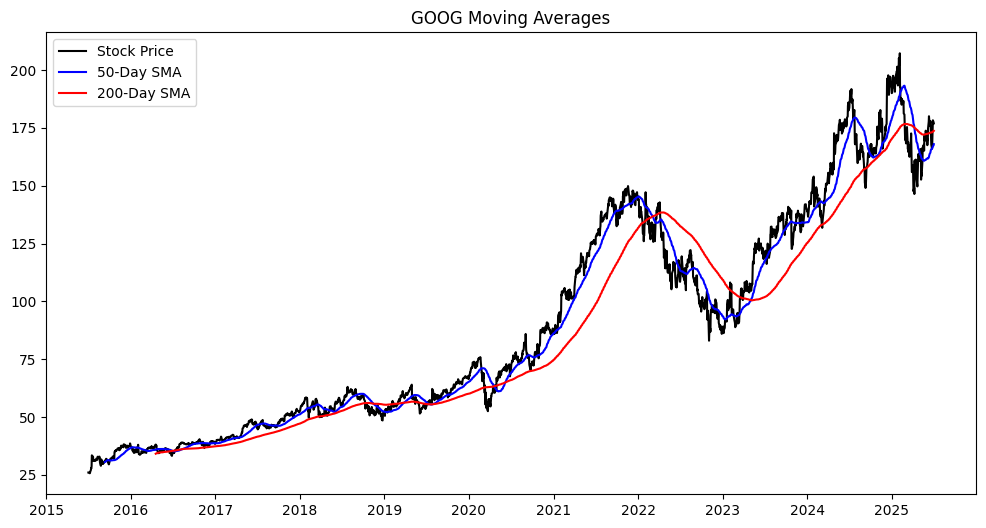


Conclusion :

Bearish Signal: GOOG is trending down based on moving averages.


In [5]:
# Technical Analysis
print("\nTechnical Analysis :\n")
history['SMA_50'] = history['Close'].rolling(window=50).mean()
history['SMA_200'] = history['Close'].rolling(window=200).mean()
history['Daily Return'] = history['Close'].pct_change()

# Plot stock price with moving averages
plt.figure(figsize=(12,6))
plt.plot(history['Close'], label='Stock Price', color='black')
plt.plot(history['SMA_50'], label='50-Day SMA', color='blue')
plt.plot(history['SMA_200'], label='200-Day SMA', color='red')
plt.title(f"{stock_ticker} Moving Averages")
plt.legend()
plt.show()

# Check for bullish or bearish trend
print("\nConclusion :\n")
if history['SMA_50'].iloc[-1] > history['SMA_200'].iloc[-1]:
    print(f"Bullish Signal: {stock_ticker} is trending up based on moving averages.")
    technical_analysis = "Buy"
else:
    print(f"Bearish Signal: {stock_ticker} is trending down based on moving averages.")
    technical_analysis = "Sell"

# Linear Regression

Linear Regression :

Model Evaluation :

Mean Absolute Error: 13.394151301901452
Mean Squared Error: 289.12516487847336
R-Squared Score: 0.8689501490221768


GOOG Price Prediction using Linear Regression :



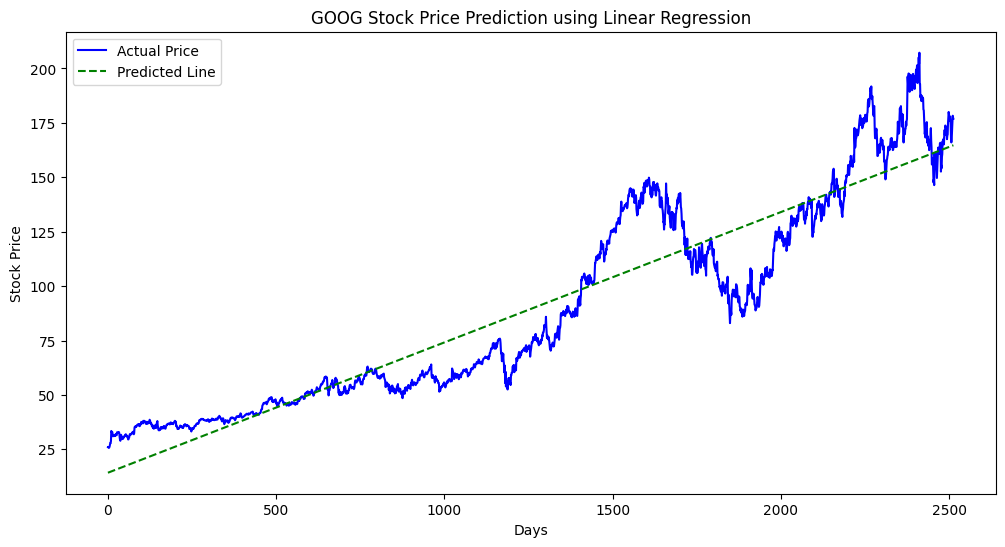


Conclusion :

Sell Signal: Predicted price (164.77) is lower than the current price (176.91).




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Fetch data from Yahoo Finance for 10+ years
history = ticker.history(period="10y")

# Prepare data for Linear Regression
history = history.dropna()
history['Date'] = history.index
df = history[['Close']].reset_index(drop=True)
df['Day'] = np.arange(len(df))

# Split data into training and testing sets
X = df[['Day']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation
print("Linear Regression :\n")
print("Model Evaluation :\n")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}\n")

print(f"\n{stock_ticker} Price Prediction using Linear Regression :\n")
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(df['Day'], df['Close'], label='Actual Price', color='blue')
plt.plot(df['Day'], model.predict(X), label='Predicted Line', color='green', linestyle='dashed')
plt.title(f"{stock_ticker} Stock Price Prediction using Linear Regression")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Conclusion based on prediction
latest_predicted_price = model.predict([[df['Day'].iloc[-1] + 1]])[0]
current_price = df['Close'].iloc[-1]

print("\nConclusion :\n")
if latest_predicted_price > current_price:
    print(f"Buy Signal: Predicted price ({latest_predicted_price:.2f}) is higher than the current price ({current_price:.2f}).\n\n")
    linear_regression_model = "Buy"
else:
    print(f"Sell Signal: Predicted price ({latest_predicted_price:.2f}) is lower than the current price ({current_price:.2f}).\n\n")
    linear_regression_model = "Sell"

# Logistic Regression Model


Logistic Regression Model 

Best Hyperparameters: {'C': 0.01}
Accuracy: 0.49800796812749004

Classification Report:

               precision    recall  f1-score   support

           0       0.46      0.69      0.55       225
           1       0.58      0.34      0.43       277

    accuracy                           0.50       502
   macro avg       0.52      0.52      0.49       502
weighted avg       0.52      0.50      0.48       502


Confusion Matrix :



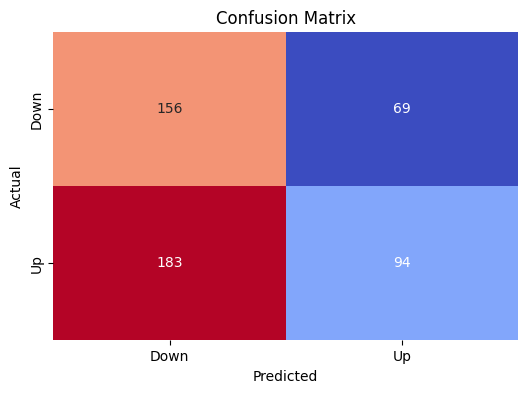


GOOG Price Prediction using Logistic Regression :



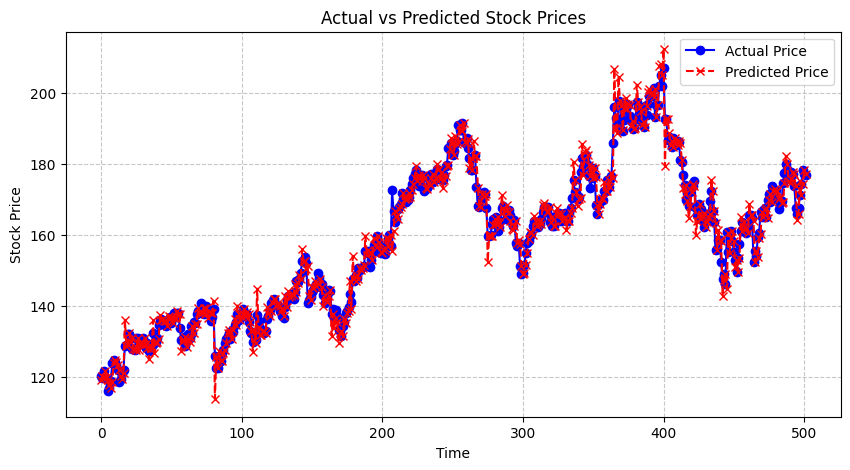


Conclusion :

Sell Recommendation: The model predicts a downward trend for GOOG.



In [7]:
# Ensure 'Daily Return' is computed correctly
if 'Daily Return' not in history.columns:
    history['Daily Return'] = history['Close'].pct_change()

# Add more technical indicators
history['Momentum'] = history['Close'] - history['Close'].shift(4)
history['Volatility'] = history['Daily Return'].rolling(window=5).std()
history['SMA_10'] = history['Close'].rolling(window=10).mean()

# Ensure SMA_50 and SMA_200 are computed
history['SMA_50'] = history['Close'].rolling(window=50).mean()
history['SMA_200'] = history['Close'].rolling(window=200).mean()

# Logistic Regression Model for Predicting Stock Movement
print("\nLogistic Regression Model \n")
history['Target'] = (history['Close'].shift(-1) > history['Close']).astype(int)

features = ['SMA_50', 'SMA_200', 'Daily Return', 'Momentum', 'Volatility', 'SMA_10']

# Drop rows where any feature or target is NaN
history.dropna(subset=features + ['Target'], inplace=True)

X = history[features]
y = history['Target']

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Map predicted movements to actual prices
predicted_prices = history['Close'].iloc[-len(y_test):].values * (1 + (y_pred * 2 - 1) * history['Daily Return'].iloc[-len(y_test):].values)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

print(f"\nConfusion Matrix :\n")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"\n{stock_ticker} Price Prediction using Logistic Regression :\n")
plt.figure(figsize=(10,5))
plt.plot(history['Close'].iloc[-len(y_test):].values, label="Actual Price", color="blue", marker='o', linestyle='-')
plt.plot(predicted_prices, label="Predicted Price", color="red", marker='x', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nConclusion :\n")
if y_pred[-1] == 1:
    print(f"Buy Recommendation: The model predicts an upward trend for {stock_ticker}.\n")
    logistic_regression_model = "Buy"
else:
    print(f"Sell Recommendation: The model predicts a downward trend for {stock_ticker}.\n")
    logistic_regression_model = "Sell"

# Random Forest Regressor & Classifier


GOOG Price Prediction using Random Forest Regressor & Classifier :

Regression Model Performance :

Mean Absolute Error: 0.6100356886762778
Mean Squared Error: 0.899017789385959

Classification Model Performance :

Accuracy: 0.5615550755939525

GOOG Actual vs Predicted Prices using Random Forest Regressor & Classifier :



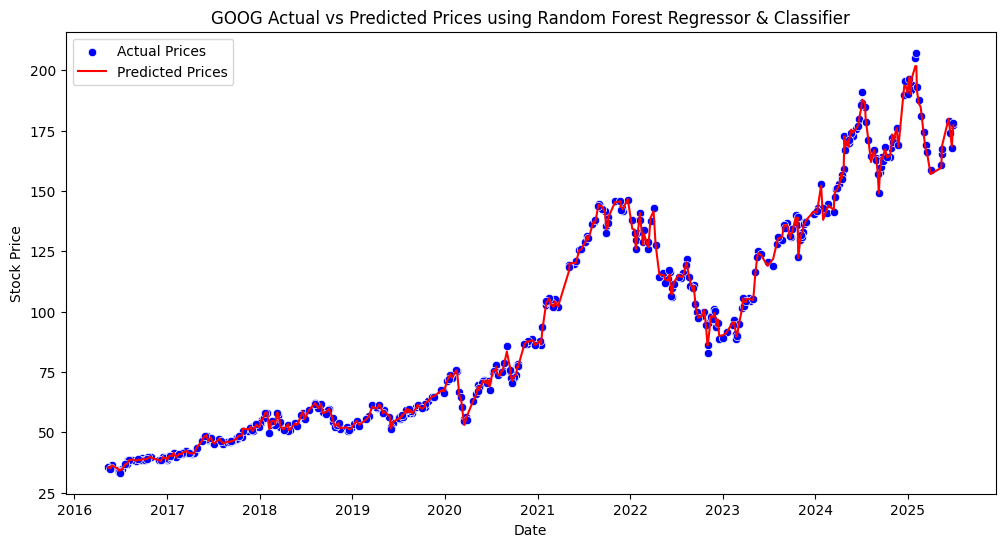


Conclusion :

Buy Signal: GOOG is predicted to go up.



In [8]:
# Fetch historical stock data
def fetch_stock_data(stock_ticker):
    ticker = yf.Ticker(stock_ticker)
    history = ticker.history(period="10y")
    return history

# Get stock ticker from user
history = fetch_stock_data(stock_ticker)

# Prepare data for prediction
history['Returns'] = history['Close'].pct_change()
history['SMA_50'] = history['Close'].rolling(window=50).mean()
history['SMA_200'] = history['Close'].rolling(window=200).mean()
history.dropna(inplace=True)

# Feature selection and target variable
features = ['SMA_50', 'SMA_200', 'Open', 'High', 'Low', 'Volume']
X = history[features]
y_reg = history['Close']  # For regression
y_clf = (history['Returns'] > 0).astype(int)  # Classification: 1 if return > 0 else 0

# Split data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Train Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_clf, y_train_clf)
y_pred_clf = classifier.predict(X_test_clf)

# Performance evaluation
print(f"\n{stock_ticker} Price Prediction using Random Forest Regressor & Classifier :")
print("\nRegression Model Performance :\n")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")

print("\nClassification Model Performance :\n")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf)}\n")

print(f"{stock_ticker} Actual vs Predicted Prices using Random Forest Regressor & Classifier :\n")
# Improved graph with scatter plot and trend lines
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test_reg.index, y=y_test_reg, label='Actual Prices', color='blue')
sns.lineplot(x=y_test_reg.index, y=y_pred_reg, label='Predicted Prices', color='red')
plt.title(f"{stock_ticker} Actual vs Predicted Prices using Random Forest Regressor & Classifier")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Conclusion
print("\nConclusion :\n")
if y_pred_clf[-1] == 1:
    print(f"Buy Signal: {stock_ticker} is predicted to go up.\n")
    random_forest = "Buy"
else:
    print(f"Sell Signal: {stock_ticker} is predicted to go down.\n")
    random_forest = "Sell"

# Support Vector Machine (SVM)

/tmp/ipython-input-9-2861992484.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  history = yf.download(stock_ticker, period="10y")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GOOG Actual vs Predicted Prices using SVM :



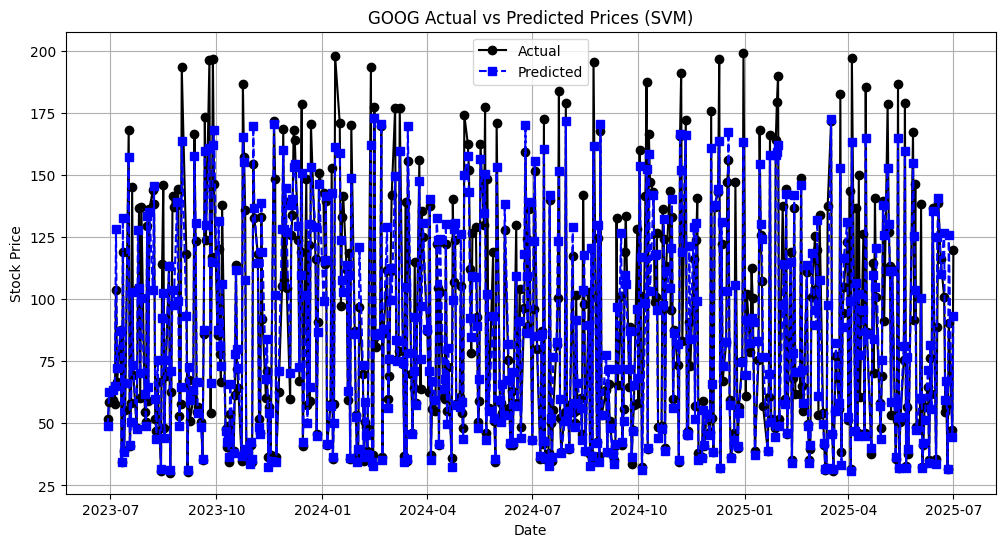


Conclusion :

Mean Squared Error: 253.97305860052455
R-squared Score: 0.8848833135189402

Prediction: Price is expected to drop. Consider SELLING GOOG.


In [9]:
# Fetch 10-year historical data
history = yf.download(stock_ticker, period="10y")

# Prepare data for SVM
history.dropna(inplace=True)
history['Date'] = history.index
history['Date'] = history['Date'].map(pd.Timestamp.toordinal)

X = history[['Date']]
y = history['Close']

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Plot actual vs predicted
print(f"\n{stock_ticker} Actual vs Predicted Prices using SVM :\n")
plt.figure(figsize=(12,6))
plt.plot(history.index[-len(y_test):], y_test.values, label='Actual', color='black', marker='o')
plt.plot(history.index[-len(y_test):], y_pred, label='Predicted', color='blue', linestyle='dashed', marker='s')
plt.title(f"{stock_ticker} Actual vs Predicted Prices (SVM)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
print("\nConclusion :\n")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}\n")

# Conclusion: Buy or Sell
latest_predicted = svm_model.predict(scaler.transform([[history['Date'].iloc[-1]]])).item()
latest_actual = history['Close'].iloc[-1].item()

if latest_predicted > latest_actual:
    print(f"Prediction: Price is expected to rise. Consider BUYING {stock_ticker}.")
    svm_model = "Buy"
else:
    print(f"Prediction: Price is expected to drop. Consider SELLING {stock_ticker}.")
    svm_model = "Sell"

# XGBoost & LightGBM


XGBoost Model :

XGBoost RMSE: 2.1597925175506294
XGBoost R2 Score: 0.9978744358766619

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 2
[LightGBM] [Info] Start training from score 89.338705

LightGBM Model :

LightGBM RMSE: 1.9970647843835252
LightGBM R2 Score: 0.9981826672472665


GOOG Price Trend Over 10 Years :



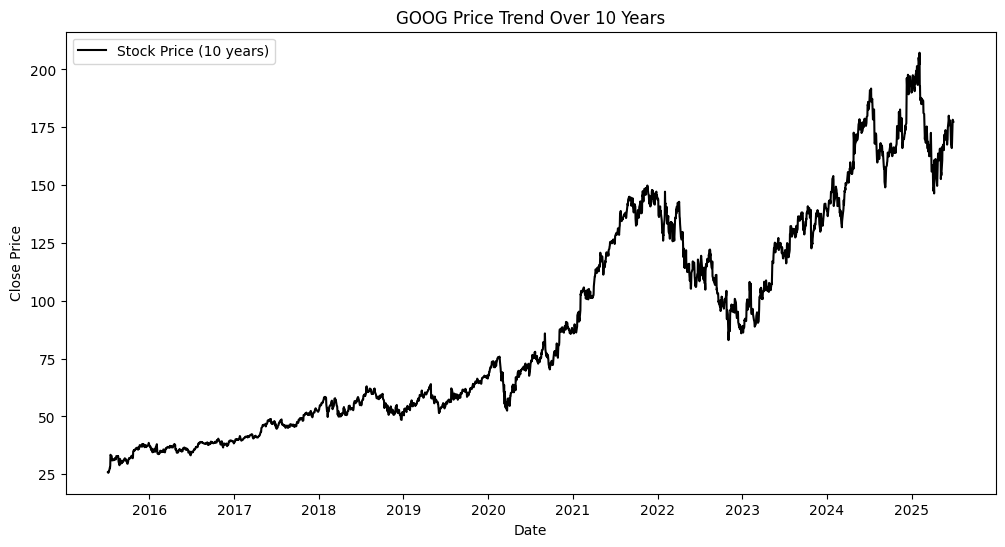


GOOG Actual vs Predicted Prices :



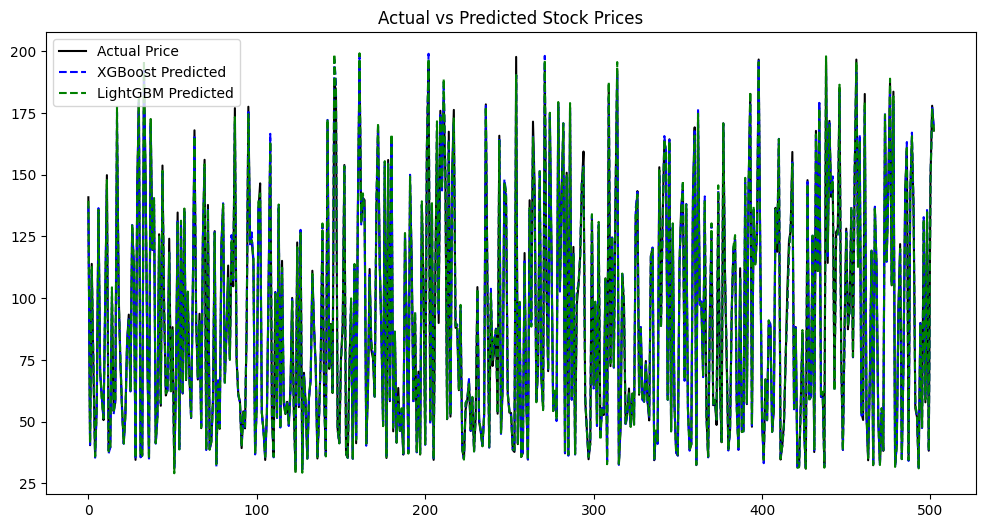


Conclusion :

Both models predict a downward trend. Suggested action: SELL GOOG.


In [10]:
# Fetch 10-year historical data
data = history[['Close']].dropna()
data = data[-2520:]  # Approx. 252 trading days per year * 10 years
data['Returns'] = data['Close'].pct_change()
data.dropna(inplace=True)
data['Future_Close'] = data['Close'].shift(-1)  # Renamed to avoid issues
data.dropna(inplace=True)

X = data[['Close', 'Returns']]
y = data['Future_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert MultiIndex columns to a standard Index
if isinstance(X_train.columns, pd.MultiIndex):
    X_train.columns = ['_'.join(col).strip() for col in X_train.columns]
    X_test.columns = ['_'.join(col).strip() for col in X_test.columns]

# Rename columns to remove special characters
X_train.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in X_test.columns]

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)
print("\nXGBoost Model :\n")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost R2 Score: {xgb_r2}\n")

# LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
lgb_r2 = r2_score(y_test, lgb_preds)
print("\nLightGBM Model :\n")
print(f"LightGBM RMSE: {lgb_rmse}")
print(f"LightGBM R2 Score: {lgb_r2}\n")

# Price Graph Over 10 Years
print(f"\n{stock_ticker} Price Trend Over 10 Years :\n")
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Stock Price (10 years)", color='black')
plt.title(f"{stock_ticker} Price Trend Over 10 Years")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Graph Comparing Actual vs Predicted Prices
print(f"\n{stock_ticker} Actual vs Predicted Prices :\n")
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price", color='black')
plt.plot(xgb_preds, label="XGBoost Predicted", linestyle='dashed', color='blue')
plt.plot(lgb_preds, label="LightGBM Predicted", linestyle='dashed', color='green')
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

# Conclusion on Buy or Sell Decision
latest_close = history['Close'].iloc[-1].item()  # Ensure scalar value
xgb_latest_pred = xgb_preds[-1]
lgb_latest_pred = lgb_preds[-1]

print("\nConclusion :\n")
if xgb_latest_pred > latest_close and lgb_latest_pred > latest_close:
    print(f"Both models predict an upward trend. Suggested action: BUY {stock_ticker}.")
    xgboost_lightgbm_model = "Buy"
elif xgb_latest_pred < latest_close and lgb_latest_pred < latest_close:
    print(f"Both models predict a downward trend. Suggested action: SELL {stock_ticker}.")
    xgboost_lightgbm_model = "Sell"
else:
    print(f"Models have mixed predictions. Suggested action: HOLD {stock_ticker}, observe further.")
    xgboost_lightgbm_model = "Hold"


# Artificial Neural Networks (ANN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

GOOG Actual vs. Predicted Prices (ANN) :



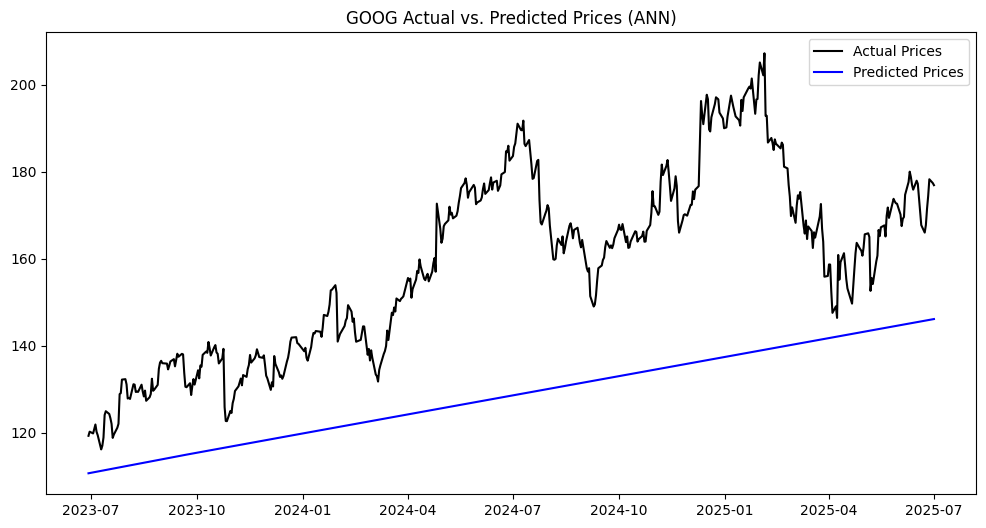


Conclusion :

SELL Signal: GOOG's price is predicted to decrease.


In [11]:
# Fetch 10 years of data
history = ticker.history(period="10y")
history['Date'] = history.index
history['Ordinal Date'] = history['Date'].map(pd.Timestamp.toordinal)
features = ['Ordinal Date']
X = history[features].values
Y = history['Close'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, shuffle=False)

# Define ANN Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)

# Predictions
Y_pred = model.predict(X_test)
Y_pred_rescaled = scaler.inverse_transform(Y_pred)
Y_test_rescaled = scaler.inverse_transform(Y_test)

# Plot Actual vs. Predicted Prices
print(f"\n{stock_ticker} Actual vs. Predicted Prices (ANN) :\n")
plt.figure(figsize=(12,6))
plt.plot(history.index[-len(Y_test):], Y_test_rescaled, label='Actual Prices', color='black')
plt.plot(history.index[-len(Y_pred):], Y_pred_rescaled, label='Predicted Prices', color='blue')
plt.title(f"{stock_ticker} Actual vs. Predicted Prices (ANN)")
plt.legend()
plt.show()

# Buy/Sell Conclusion
print("\nConclusion :\n")
if Y_pred_rescaled[-1] > Y_test_rescaled[-1]:
    print(f"BUY Signal: {stock_ticker}'s price is predicted to increase.")
    ann_model = "Buy"

else:
    print(f"SELL Signal: {stock_ticker}'s price is predicted to decrease.")
    ann_model = "Sell"

# Recurrent Neural Networks (RNN)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 54s 551ms/step - loss: 0.0184
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 565ms/step - loss: 5.3637e-04
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 564ms/step - loss: 5.2978e-04
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 573ms/step - loss: 4.5762e-04
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 82s 578ms/step - loss: 4.7828e-04
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 572ms/step - loss: 4.8538e-04
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 556ms/step - loss: 4.6463e-04
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 582ms/step - loss: 3.6943e-04
Epoch 9/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 563ms/step - loss: 3.4087e-04
Epoch 10/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 84s 588ms/step - loss: 3.7071e-04
Epoch 11/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 571ms/step - loss: 3.1455e-04
Epoch 12/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 567ms/step - loss: 3.4002e-04
Epoch 13/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 591ms/step - loss: 2.6388e-04
Epoch 14/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 617ms/step - loss: 3.1293e-04
Ep

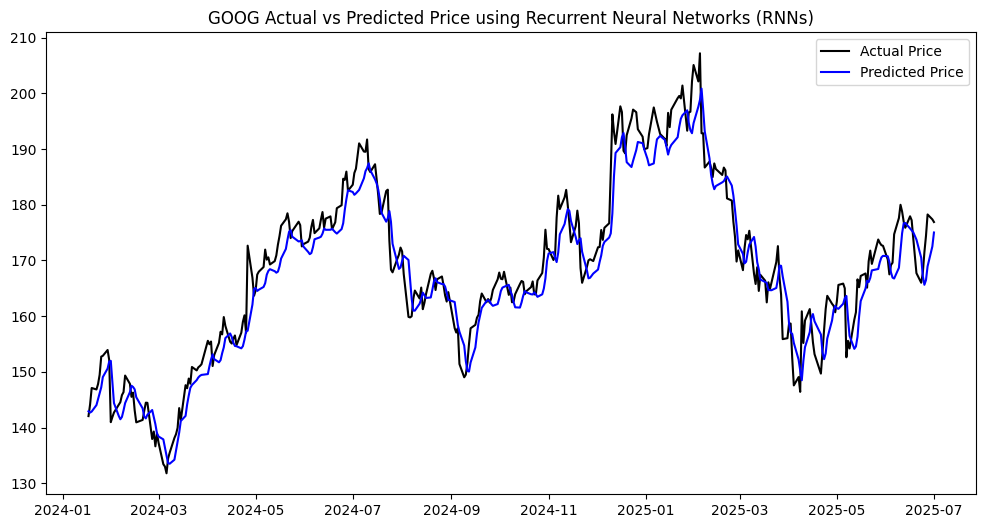


Conclusion :

Last Actual Price: 176.91000366210938
Last Predicted Price: 175.0303497314453
Prediction suggests a downward trend. Consider SELLING GOOG.



In [12]:
# Prepare data for RNN
scaler = MinMaxScaler(feature_range=(0,1))
data = history[['Close']].copy()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 730  # Use last 2 years (730 days) to predict the next day
X, y = create_sequences(data_scaled, seq_length)
X_train, y_train = X[:-365], y[:-365]
X_test, y_test = X[-365:], y[-365:]

# Build RNN Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, batch_size=16, epochs=20)

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot results
print(f"\n\n{stock_ticker} : Actual vs Predicted Price using Recurrent Neural Networks (RNNs) :\n")
plt.figure(figsize=(12,6))
plt.plot(data.index[-365:], y_test_rescaled, label='Actual Price', color='black')
plt.plot(data.index[-365:], y_pred_rescaled, label='Predicted Price', color='blue')
plt.title(f"{stock_ticker} Actual vs Predicted Price using Recurrent Neural Networks (RNNs)")
plt.legend()
plt.show()

# Conclusion
last_predicted = y_pred_rescaled[-1][0]
last_actual = y_test_rescaled[-1][0]
print("\nConclusion :\n")
print(f"Last Actual Price: {last_actual}")
print(f"Last Predicted Price: {last_predicted}")

if last_predicted > last_actual:
    print(f"Prediction suggests an upward trend. Consider BUYING {stock_ticker}.\n")
    rnn_model = "Buy"
elif last_predicted < last_actual:
    print(f"Prediction suggests a downward trend. Consider SELLING {stock_ticker}.\n")
    rnn_model = "Sell"
else:
    print(f"Prediction suggests stability. Hold your position in {stock_ticker}.\n")
    rnn_model = "Hold"

# Long Short-Term Memory (LSTM)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0077 - val_loss: 0.0036
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 9.7732e-04 - val_loss: 0.0012
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 7.4530e-04 - val_loss: 0.0023
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 6.2907e-04 - val_loss: 0.0030
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 6.2136e-04 - val_loss: 8.4333e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 5.1814e-04 - val_loss: 8.7582e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 5.9439e-04 - val_loss: 0.0013
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.4603e-04 - val_loss: 0.0030
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 5.0806e-04 - val_loss: 0.0025
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 5.0877e-04 - val_loss: 0.0014
E

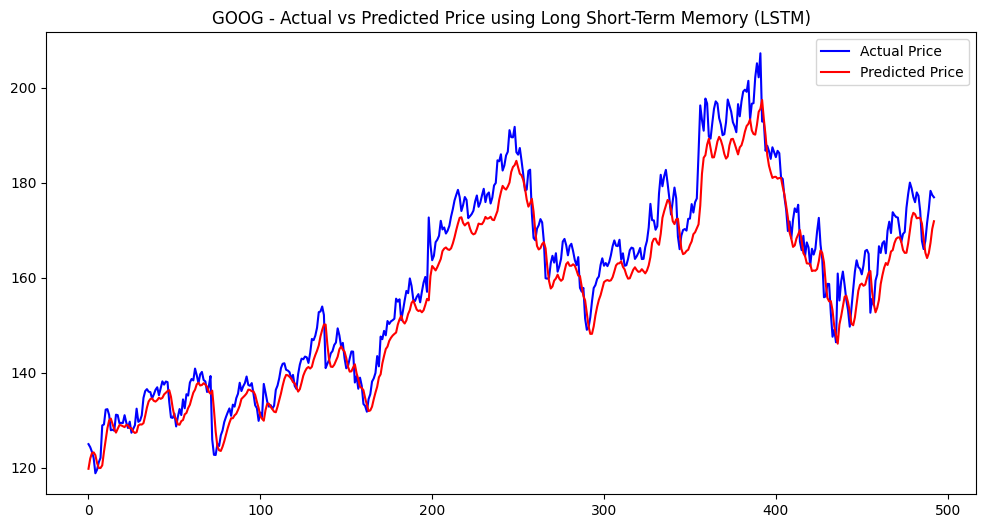


Conclusion :

Sell Signal: GOOG's predicted price (171.87) is lower than its current price (176.91).



In [13]:
# Fetch data from previous analysis
data = history[['Close']]
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50  # Higher number for higher accuracy
X, y = create_sequences(data_scaled, seq_length)
X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
print(f"\n\n{stock_ticker} Price Prediction using Long Short-Term Memory (LSTM) :\n")
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price', color='blue')
plt.plot(y_pred_inv, label='Predicted Price', color='red')
plt.title(f"{stock_ticker} - Actual vs Predicted Price using Long Short-Term Memory (LSTM)")
plt.legend()
plt.show()

# Conclusion
latest_pred = y_pred_inv[-1][0]
latest_actual = y_test_inv[-1][0]
print("\nConclusion :\n")
if latest_pred > latest_actual:
    print(f"Buy Signal: {stock_ticker}'s predicted price ({latest_pred:.2f}) is higher than its current price ({latest_actual:.2f}).\n")
    lstm_model = "Buy"
else:
    print(f"Sell Signal: {stock_ticker}'s predicted price ({latest_pred:.2f}) is lower than its current price ({latest_actual:.2f}).\n")
    lstm_model = "Sell"

# Gated Recurrent Units (GRU)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0099 - val_loss: 0.0013
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 9.8278e-04 - val_loss: 0.0011
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 9.3887e-04 - val_loss: 0.0023
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 7.8306e-04 - val_loss: 0.0015
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 5.2704e-04 - val_loss: 5.1929e-04
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 5.4533e-04 - val_loss: 4.7363e-04
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 5.0650e-04 - val_loss: 0.0019
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 5.5723e-04 - val_loss: 0.0017
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 4.3188e-04 - val_loss: 5.5739e-04
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 4.4030e-04 - val_loss: 5.4180e-04
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 4.8458e-04 - val_loss:

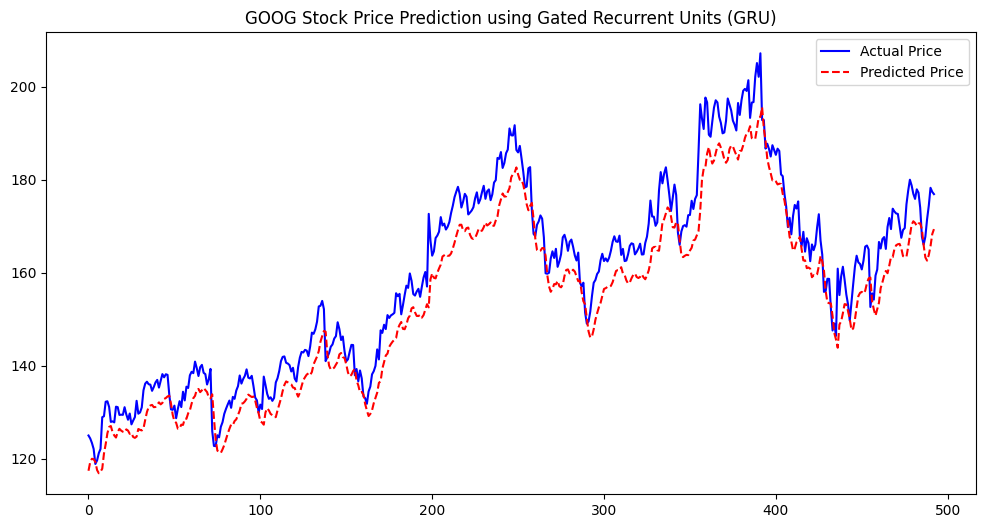


Conclusion :

Predicted price decrease: -4.26%. Suggested action: SELL


In [14]:
time_steps = 50  # Number of time steps to look back

def create_sequences(data, time_steps):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

# Prepare data for GRU model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(history[['Close']])
X, y = create_sequences(scaled_data, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build GRU Model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    GRU(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
print(f"\n\n{stock_ticker} Price Prediction using Gated Recurrent Units (GRU) :\n")
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price', color='blue')
plt.plot(y_pred_inv, label='Predicted Price', color='red', linestyle='dashed')
plt.title(f'{stock_ticker} Stock Price Prediction using Gated Recurrent Units (GRU)')
plt.legend()
plt.show()

# Conclusion
last_actual = y_test_inv[-1][0]
last_predicted = y_pred_inv[-1][0]
price_change = ((last_predicted - last_actual) / last_actual) * 100

print("\nConclusion :\n")
if price_change > 1:
    print(f"Predicted price increase: {price_change:.2f}%. Suggested action: BUY")
    gru_model = "Buy"
elif price_change < -1:
    print(f"Predicted price decrease: {price_change:.2f}%. Suggested action: SELL")
    gru_model = "Sell"
else:
    print(f"Minor price change ({price_change:.2f}%). Suggested action: HOLD")
    gru_model = "Hold"

# Transformer Models

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/20, Loss: 0.0106
Epoch 2/20, Loss: 0.0027
Epoch 3/20, Loss: 0.0014
Epoch 4/20, Loss: 0.0015
Epoch 5/20, Loss: 0.0013
Epoch 6/20, Loss: 0.0015
Epoch 7/20, Loss: 0.0015
Epoch 8/20, Loss: 0.0008
Epoch 9/20, Loss: 0.0004
Epoch 10/20, Loss: 0.0004
Epoch 11/20, Loss: 0.0007
Epoch 12/20, Loss: 0.0006
Epoch 13/20, Loss: 0.0003
Epoch 14/20, Loss: 0.0004
Epoch 15/20, Loss: 0.0003
Epoch 16/20, Loss: 0.0014
Epoch 17/20, Loss: 0.0006
Epoch 18/20, Loss: 0.0009
Epoch 19/20, Loss: 0.0003
Epoch 20/20, Loss: 0.0003


GOOG Price Prediction using Transformer model :



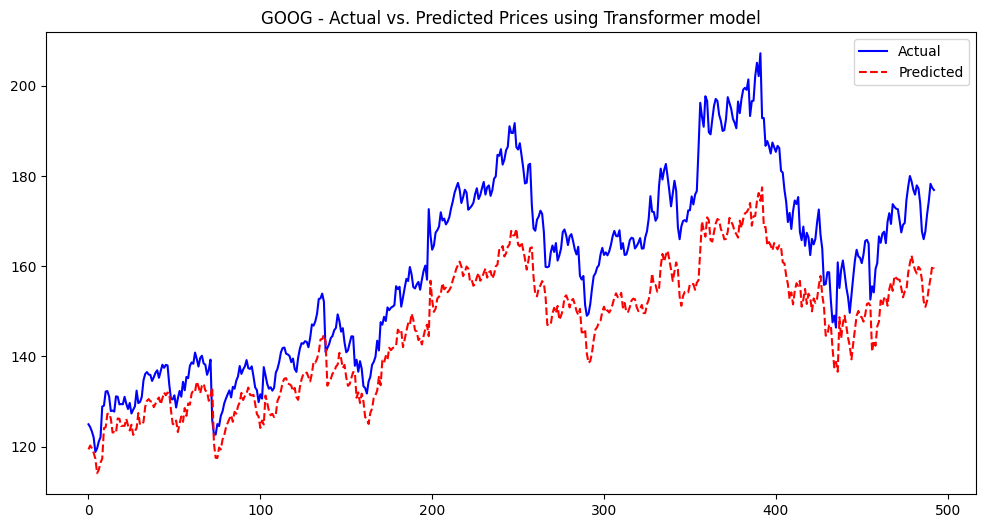


Conclusion :

Predicted price is lower than the current price. Consider Selling GOOG.


In [15]:
# Data Preprocessing
scaler = MinMaxScaler()
history['Scaled_Close'] = scaler.fit_transform(history[['Close']])

# Prepare data for Transformer model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50
X, y = create_sequences(history['Scaled_Close'].values, seq_length)
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, hidden_dim, num_layers):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim),
            num_layers=num_layers
        )
        self.fc = nn.Linear(embed_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x[:, -1, :])
        return x

# Initialize model
model = TransformerModel(input_dim=1, embed_dim=64, num_heads=4, hidden_dim=128, num_layers=2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20 # Higher number for higher accuracy
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch.unsqueeze(-1))
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Predictions
model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        y_pred = model(X_batch.unsqueeze(-1))
        y_pred_list.extend(y_pred.squeeze().tolist())

# Inverse scale
y_pred_list = scaler.inverse_transform(np.array(y_pred_list).reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted
print(f"\n\n{stock_ticker} Price Prediction using Transformer model :\n")
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(y_pred_list, label='Predicted', color='red', linestyle='dashed')
plt.title(f"{stock_ticker} - Actual vs. Predicted Prices using Transformer model")
plt.legend()
plt.show()

# Buy/Sell Recommendation
print("\nConclusion :\n")
if y_pred_list[-1] > y_test_actual[-1]:
    print(f"Predicted price is higher than the current price. Consider Buying {stock_ticker}.")
    transformer_model = "Buy"
else:
    print(f"Predicted price is lower than the current price. Consider Selling {stock_ticker}.")
    transformer_model = "Sell"

# ARIMA and ARCH/GARCH


Time Series Forecasting :



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003391. Parameter
estimation work bett


Plot actual vs. predicted for ARIMA :



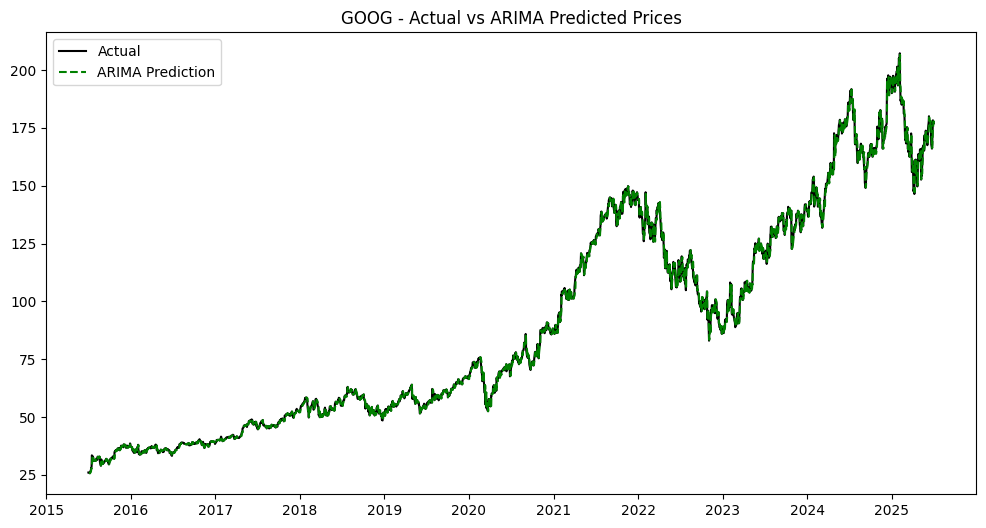


Plot GARCH Volatility :



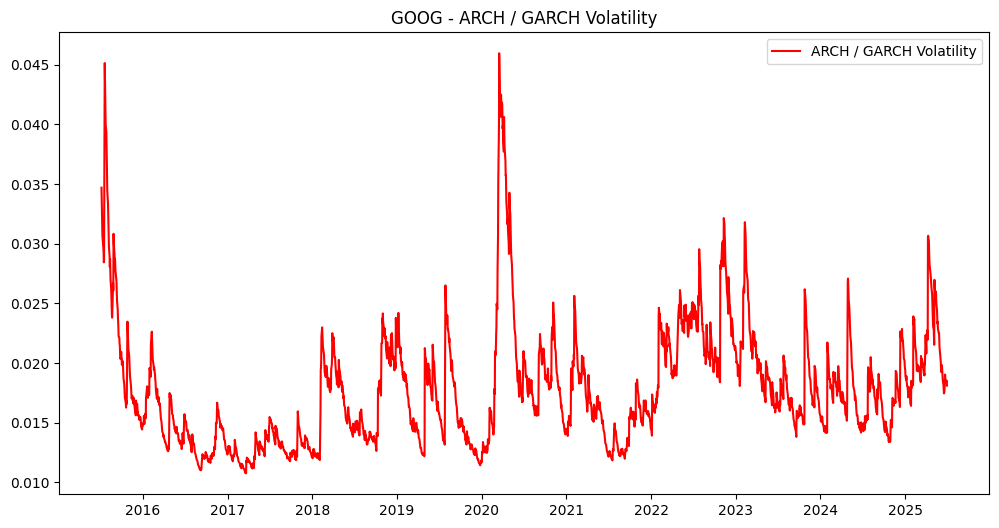


Conclusion :

Sell Signal: GOOG's predicted price (176.39) is lower than the current price (176.91).
High volatility detected for GOOG. Trade with caution.




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Time Series Forecasting using ARIMA and ARCH/GARCH
print("\nTime Series Forecasting :\n")

# Prepare data for ARIMA
history.dropna(inplace=True)
returns = history['Close'].pct_change().dropna()

# ARIMA Model
arima_model = ARIMA(history['Close'], order=(5,1,0))
arima_result = arima_model.fit()
history['ARIMA_Prediction'] = arima_result.predict(start=history.index[1], end=history.index[-1], dynamic=False)

# ARCH/GARCH Model
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
history['GARCH_Volatility'] = garch_result.conditional_volatility

# Plot actual vs. predicted for ARIMA
print("\nPlot actual vs. predicted for ARIMA :\n")
plt.figure(figsize=(12,6))
plt.plot(history['Close'], label='Actual', color='black')
plt.plot(history['ARIMA_Prediction'], label='ARIMA Prediction', linestyle='dashed', color='green')
plt.title(f"{stock_ticker} - Actual vs ARIMA Predicted Prices")
plt.legend()
plt.show()

# Plot GARCH Volatility
print("\nPlot GARCH Volatility :\n")
plt.figure(figsize=(12,6))
plt.plot(history['GARCH_Volatility'], label='ARCH / GARCH Volatility', color='red')
plt.title(f"{stock_ticker} - ARCH / GARCH Volatility")
plt.legend()
plt.show()

# Detailed Conclusion
print("\nConclusion :\n")
arima_forecast = arima_result.forecast(steps=1)
arima_forecast_value = arima_forecast.iloc[-1]  # Ensure correct indexing
if arima_forecast_value > history['Close'].iloc[-1]:
    print(f"Buy Signal: {stock_ticker}'s predicted price ({arima_forecast_value:.2f}) is higher than the current price ({history['Close'].iloc[-1]:.2f}).")
    time_series_forecasting = "Buy"
else:
    print(f"Sell Signal: {stock_ticker}'s predicted price ({arima_forecast_value:.2f}) is lower than the current price ({history['Close'].iloc[-1]:.2f}).")
    time_series_forecasting = "Sell"

if history['GARCH_Volatility'].iloc[-1] > history['GARCH_Volatility'].mean():
    print(f"High volatility detected for {stock_ticker}. Trade with caution.\n\n")
else:
    print(f"Stable volatility for {stock_ticker}. Market is relatively calm.\n\n")

# SARIMA Model


 SARIMA Model Forecasting :

ADF Statistic: -0.2659874433499272
p-value: 0.9301852972156957
The data is not stationary.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(




GOOG Price Prediction using SARIMA :



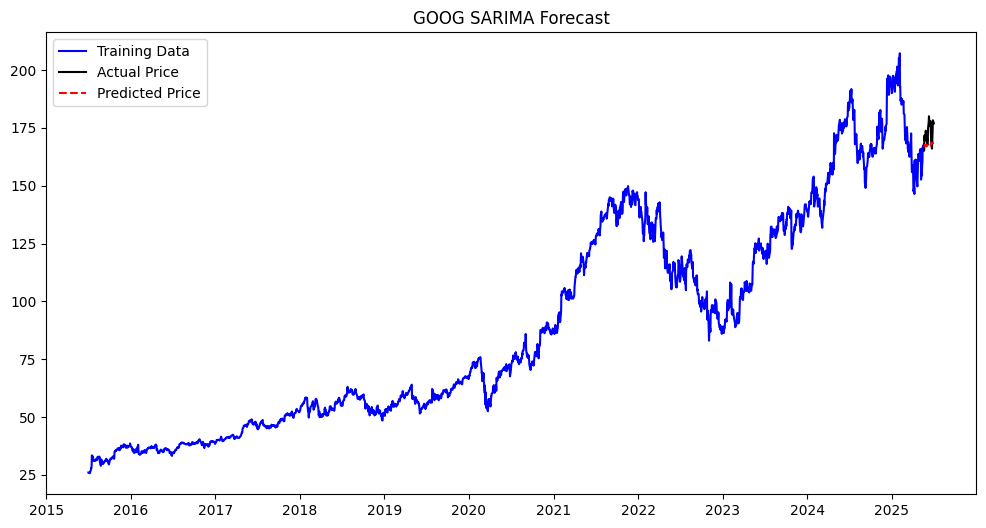


Conclusion :

Sell Signal: GOOG is expected to drop based on SARIMA prediction.


In [17]:
print("\n SARIMA Model Forecasting :\n")

# Checking stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The data is stationary.\n")
    else:
        print("The data is not stationary.\n")

# Ensure 'Close' column exists before proceeding
if 'Close' not in history.columns:
    print("\nError: 'Close' column not found in the data. Check the ticker or data source.\n")
    exit()

check_stationarity(history['Close'])

# Handle missing values
if history['Close'].isna().all():
    print("\nError: 'Close' column has all NaN values. Exiting...\n")
    exit()
history['Close'] = history['Close'].ffill()

# Fit SARIMA model
train = history['Close'][:-30]  # Use all but last 30 days for training
test = history['Close'][-30:]

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot actual vs predicted
print(f"\n\n{stock_ticker} Price Prediction using SARIMA :\n")
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Price', color='black')
plt.plot(test.index, forecast, label='Predicted Price', color='red', linestyle='dashed')
plt.title(f"{stock_ticker} SARIMA Forecast")
plt.legend()
plt.show()

# Conclusion
print("\nConclusion :\n")
if forecast.iloc[-1] > test.iloc[-1]:
    print(f"Buy Signal: {stock_ticker} is expected to rise based on SARIMA prediction.")
    sarima_model = "Buy"
else:
    print(f"Sell Signal: {stock_ticker} is expected to drop based on SARIMA prediction.")
    sarima_model = "Sell"

# Prophet model

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date', 'Ordinal Date', 'Scaled_Close', 'ARIMA_Prediction',
       'GARCH_Volatility'],
      dtype='object')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprj6nqdru/thfvapv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprj6nqdru/ilu14jev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28402', 'data', 'file=/tmp/tmprj6nqdru/thfvapv6.json', 'init=/tmp/tmprj6nqdru/ilu14jev.json', 'output', 'file=/tmp/tmprj6nqdru/prophet_model2amlliyw/prophet_model-20250702021108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




GOOG Price Prediction using Prophet :



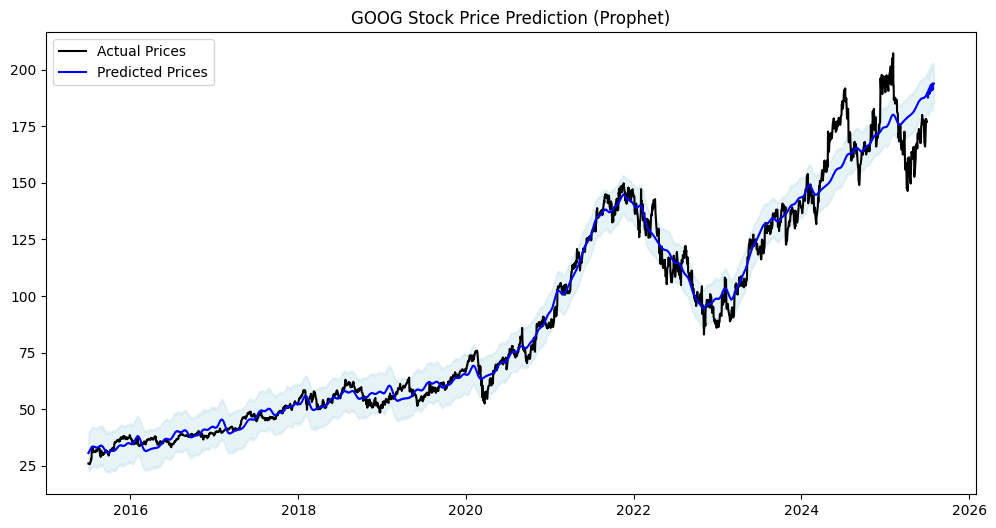


Conclusion :

Current Price: 176.91
Predicted Price (Next 30 days): 193.84
Strong Buy Signal: Price expected to rise significantly.


In [18]:
# Prepare data for Prophet
history = history.reset_index(drop=True)  # Fix: Prevent duplicate index columns
print(history.columns)  # Debugging: Print column names
history = history[['ds', 'y']] if 'ds' in history.columns else history[['Date', 'Close']]
history.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values
history['ds'] = history['ds'].dt.tz_localize(None)  # Remove timezone

# Initialize and fit Prophet model
model = Prophet()
model.fit(history)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot actual vs predicted
print(f"\n\n{stock_ticker} Price Prediction using Prophet :\n")
plt.figure(figsize=(12, 6))
plt.plot(history['ds'], history['y'], label='Actual Prices', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Prices', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)
plt.title(f"{stock_ticker} Stock Price Prediction (Prophet)")
plt.legend()
plt.show()

# Detailed Buy/Sell Conclusion
predicted_price = forecast['yhat'].iloc[-1]
current_price = history['y'].iloc[-1]

print("\nConclusion :\n")
print(f"Current Price: {current_price:.2f}")
print(f"Predicted Price (Next 30 days): {predicted_price:.2f}")
if predicted_price > current_price * 1.05:
    print("Strong Buy Signal: Price expected to rise significantly.")
    prophet_model = "Buy"
elif predicted_price > current_price:
    print("Buy Signal: Price expected to increase.")
    prophet_model = "Buy"
elif predicted_price < current_price * 0.95:
    print("Strong Sell Signal: Price expected to drop significantly.")
    prophet_model = "Sell"
else:
    print("Sell Signal: Price expected to decrease.")
    prophet_model = "Sell"

# Kalman Filter


GOOG Price Prediction using Kalman Filter :



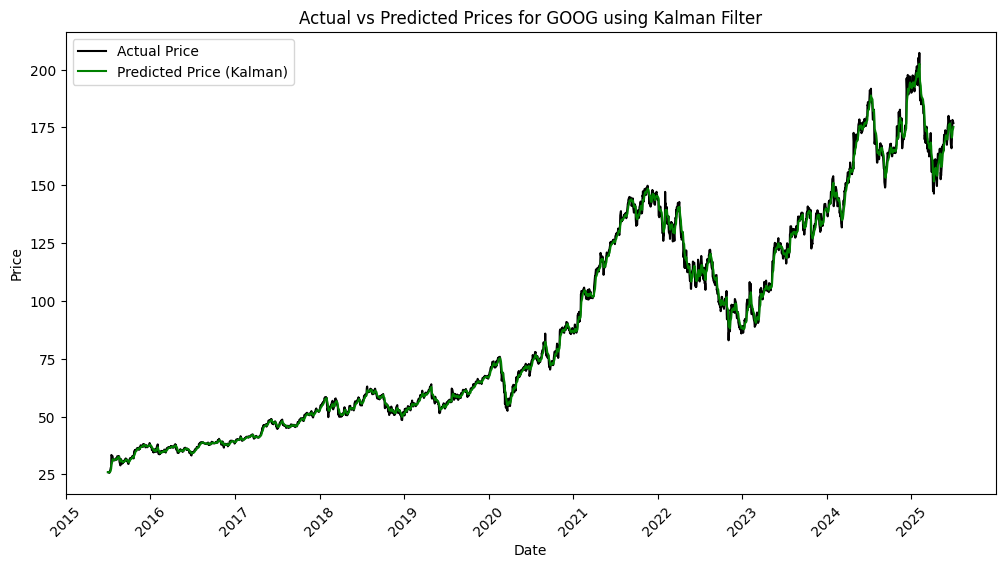


Conclusion :

SELL Signal: GOOG is expected to decline based on Kalman Filter predictions.


In [19]:
history = history.rename(columns={'y': 'Close', 'ds': 'Date'})
history = history.dropna(subset=['Close'])

# Kalman Filter Implementation
kf = KalmanFilter(initial_state_mean=history['Close'].iloc[0],
                   n_dim_obs=1,
                   n_dim_state=1,
                   transition_matrices=[1],
                   observation_matrices=[1],
                   transition_covariance=[0.01],
                   observation_covariance=[0.1])

filtered_state_means, _ = kf.filter(history['Close'].values)

# Plot actual vs predicted
print(f"\n{stock_ticker} Price Prediction using Kalman Filter :\n")
plt.figure(figsize=(12,6))
plt.plot(history['Date'], history['Close'], label='Actual Price', color='black')
plt.plot(history['Date'], filtered_state_means, label='Predicted Price (Kalman)', color='green')
plt.title(f"Actual vs Predicted Prices for {stock_ticker} using Kalman Filter")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Buy/Sell Conclusion
print("\nConclusion :\n")
if filtered_state_means[-1] > history['Close'].iloc[-1]:
    print(f"BUY Signal: {stock_ticker} is expected to rise based on Kalman Filter predictions.")
    kalman_filter_model = "Buy"
elif filtered_state_means[-1] < history['Close'].iloc[-1]:
    print(f"SELL Signal: {stock_ticker} is expected to decline based on Kalman Filter predictions.")
    kalman_filter_model = "Sell"
else:
    print(f"HOLD: {stock_ticker} is stable, no strong movement detected.")
    kalman_filter_model = "Hold"

# Deep Q-Network (DQN)

/tmp/ipython-input-20-2964826820.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  rewards = torch.tensor(batch[2], dtype=torch.float32)
/tmp/ipython-input-20-2964826820.py:46: UserWarning: Using a target size (torch.Size([32, 32])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(q_values.squeeze(), target_q_values)




GOOG Price Prediction using Deep Q-Network (DQN) :



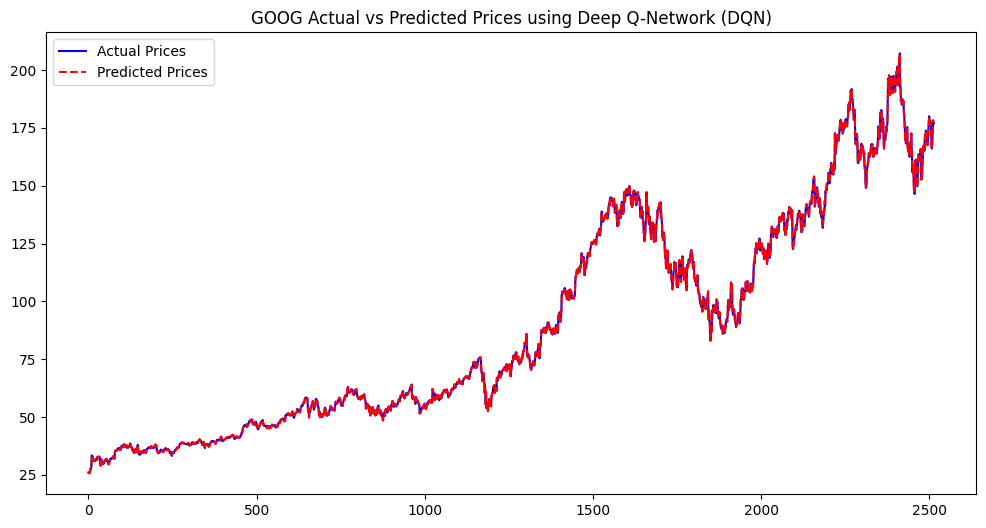


Conclusion :

Prediction suggests BUY for GOOG.


In [20]:
# Define the Deep Q-Network (DQN)
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Experience Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.memory = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Training function
def train_dqn(model, memory, optimizer, batch_size, gamma):
    if len(memory) < batch_size:
        return

    transitions = memory.sample(batch_size)
    batch = list(zip(*transitions))

    states = torch.tensor(np.array(batch[0]), dtype=torch.float32)
    actions = torch.tensor(batch[1], dtype=torch.int64).unsqueeze(1)
    rewards = torch.tensor(batch[2], dtype=torch.float32)
    next_states = torch.tensor(np.array(batch[3]), dtype=torch.float32)
    dones = torch.tensor(batch[4], dtype=torch.float32)

    q_values = model(states).gather(1, actions)
    next_q_values = model(next_states).max(1)[0].detach()
    target_q_values = rewards + (gamma * next_q_values * (1 - dones))

    loss = F.mse_loss(q_values.squeeze(), target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Initialize environment and model
env = gym.make("CartPole-v1", new_step_api=True)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
dqn_model = DQN(state_size, action_size)
optimizer = optim.Adam(dqn_model.parameters(), lr=0.001)
memory = ReplayMemory(10000)

episodes = 100
batch_size = 32
gamma = 0.99

def get_stock_data():
    return history[['Close']].pct_change().dropna().values.reshape(-1, 1)  # Ensure 2D shape

stock_data = get_stock_data()
state_size = stock_data.shape[1]

dqn_model = DQN(state_size, action_size)  # Update model with correct input size

# Train the model
for episode in range(episodes):
    state = stock_data[0]
    for t in range(len(stock_data) - 1):
        state_tensor = torch.tensor(state, dtype=torch.float32).view(1, -1)
        action = dqn_model(state_tensor).argmax().item()
        next_state = stock_data[t + 1]
        reward = next_state - state
        done = t == len(stock_data) - 2
        memory.push(state, action, reward, next_state, done)
        state = next_state
        train_dqn(dqn_model, memory, optimizer, batch_size, gamma)

# Predictions vs. Actual Data
actual_prices = history['Close'].values
predicted_prices = []
state = stock_data[0]
for t in range(len(stock_data) - 1):
    state_tensor = torch.tensor(state, dtype=torch.float32).view(1, -1)
    action = dqn_model(state_tensor).argmax().item()
    predicted_prices.append(actual_prices[t] * (1 + action * 0.01))
    state = stock_data[t + 1]

print(f"\n\n{stock_ticker} Price Prediction using Deep Q-Network (DQN) :\n")
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red', linestyle='dashed')
plt.legend()
plt.title(f"{stock_ticker} Actual vs Predicted Prices using Deep Q-Network (DQN)")
plt.show()

# Conclusion for Buy/Sell Decision
print("\nConclusion :\n")
if predicted_prices[-1] > actual_prices[-1]:
    print(f"Prediction suggests BUY for {stock_ticker}.")
    dqn_model = "Buy"
else:
    print(f"Prediction suggests SELL for {stock_ticker}.")
    dqn_model = "Sell"

# Proximal Policy Optimization (PPO)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion
/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy constr

Episode 1: Reward = 17.0
Episode 2: Reward = 30.0
Episode 3: Reward = 30.0
Episode 4: Reward = 8.0
Episode 5: Reward = 20.0
Episode 6: Reward = 35.0
Episode 7: Reward = 36.0
Episode 8: Reward = 42.0
Episode 9: Reward = 11.0
Episode 10: Reward = 38.0
Episode 11: Reward = 55.0
Episode 12: Reward = 17.0
Episode 13: Reward = 9.0
Episode 14: Reward = 46.0
Episode 15: Reward = 26.0
Episode 16: Reward = 14.0
Episode 17: Reward = 12.0
Episode 18: Reward = 14.0
Episode 19: Reward = 19.0
Episode 20: Reward = 34.0
Episode 21: Reward = 20.0
Episode 22: Reward = 17.0
Episode 23: Reward = 15.0
Episode 24: Reward = 12.0
Episode 25: Reward = 10.0
Episode 26: Reward = 16.0
Episode 27: Reward = 11.0
Episode 28: Reward = 21.0
Episode 29: Reward = 26.0
Episode 30: Reward = 13.0
Episode 31: Reward = 13.0
Episode 32: Reward = 16.0
Episode 33: Reward = 12.0
Episode 34: Reward = 10.0
Episode 35: Reward = 45.0
Episode 36: Reward = 33.0
Episode 37: Reward = 15.0
Episode 38: Reward = 54.0
Episode 39: Reward = 24

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 80: Reward = 18.0
Episode 81: Reward = 23.0
Episode 82: Reward = 12.0
Episode 83: Reward = 35.0
Episode 84: Reward = 43.0
Episode 85: Reward = 56.0
Episode 86: Reward = 24.0
Episode 87: Reward = 15.0
Episode 88: Reward = 28.0
Episode 89: Reward = 16.0
Episode 90: Reward = 17.0
Episode 91: Reward = 10.0
Episode 92: Reward = 24.0
Episode 93: Reward = 17.0
Episode 94: Reward = 28.0
Episode 95: Reward = 17.0
Episode 96: Reward = 25.0
Episode 97: Reward = 11.0
Episode 98: Reward = 9.0
Episode 99: Reward = 42.0
Episode 100: Reward = 16.0
Episode 101: Reward = 25.0
Episode 102: Reward = 20.0
Episode 103: Reward = 49.0
Episode 104: Reward = 12.0
Episode 105: Reward = 24.0
Episode 106: Reward = 30.0
Episode 107: Reward = 23.0
Episode 108: Reward = 11.0
Episode 109: Reward = 11.0
Episode 110: Reward = 54.0
Episode 111: Reward = 21.0
Episode 112: Reward = 23.0
Episode 113: Reward = 11.0
Episode 114: Reward = 20.0
Episode 115: Reward = 28.0
Episode 116: Reward = 19.0
Episode 117: Reward = 

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 135: Reward = 50.0
Episode 136: Reward = 12.0
Episode 137: Reward = 17.0
Episode 138: Reward = 21.0
Episode 139: Reward = 36.0
Episode 140: Reward = 17.0
Episode 141: Reward = 13.0
Episode 142: Reward = 22.0
Episode 143: Reward = 28.0
Episode 144: Reward = 22.0
Episode 145: Reward = 27.0
Episode 146: Reward = 26.0
Episode 147: Reward = 40.0
Episode 148: Reward = 12.0
Episode 149: Reward = 20.0
Episode 150: Reward = 35.0
Episode 151: Reward = 20.0
Episode 152: Reward = 29.0
Episode 153: Reward = 12.0
Episode 154: Reward = 30.0
Episode 155: Reward = 10.0
Episode 156: Reward = 17.0
Episode 157: Reward = 67.0
Episode 158: Reward = 15.0
Episode 159: Reward = 19.0
Episode 160: Reward = 34.0
Episode 161: Reward = 31.0
Episode 162: Reward = 51.0
Episode 163: Reward = 14.0
Episode 164: Reward = 33.0
Episode 165: Reward = 10.0
Episode 166: Reward = 19.0
Episode 167: Reward = 18.0
Episode 168: Reward = 16.0
Episode 169: Reward = 13.0
Episode 170: Reward = 17.0
Episode 171: Reward = 16.0
E

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 204: Reward = 28.0
Episode 205: Reward = 15.0
Episode 206: Reward = 13.0
Episode 207: Reward = 22.0
Episode 208: Reward = 14.0
Episode 209: Reward = 26.0
Episode 210: Reward = 20.0
Episode 211: Reward = 13.0
Episode 212: Reward = 20.0
Episode 213: Reward = 14.0
Episode 214: Reward = 24.0
Episode 215: Reward = 34.0
Episode 216: Reward = 17.0
Episode 217: Reward = 20.0
Episode 218: Reward = 13.0
Episode 219: Reward = 24.0
Episode 220: Reward = 11.0
Episode 221: Reward = 22.0
Episode 222: Reward = 47.0
Episode 223: Reward = 46.0
Episode 224: Reward = 26.0
Episode 225: Reward = 35.0
Episode 226: Reward = 17.0
Episode 227: Reward = 15.0
Episode 228: Reward = 10.0


/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 229: Reward = 32.0
Episode 230: Reward = 9.0
Episode 231: Reward = 14.0
Episode 232: Reward = 16.0
Episode 233: Reward = 15.0
Episode 234: Reward = 10.0
Episode 235: Reward = 30.0
Episode 236: Reward = 38.0
Episode 237: Reward = 17.0
Episode 238: Reward = 19.0
Episode 239: Reward = 25.0
Episode 240: Reward = 23.0
Episode 241: Reward = 16.0
Episode 242: Reward = 28.0
Episode 243: Reward = 10.0
Episode 244: Reward = 9.0
Episode 245: Reward = 21.0
Episode 246: Reward = 17.0
Episode 247: Reward = 38.0
Episode 248: Reward = 20.0
Episode 249: Reward = 25.0
Episode 250: Reward = 50.0
Episode 251: Reward = 26.0
Episode 252: Reward = 21.0
Episode 253: Reward = 19.0
Episode 254: Reward = 14.0
Episode 255: Reward = 27.0
Episode 256: Reward = 14.0


/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 257: Reward = 33.0
Episode 258: Reward = 16.0
Episode 259: Reward = 19.0
Episode 260: Reward = 20.0
Episode 261: Reward = 10.0
Episode 262: Reward = 19.0
Episode 263: Reward = 18.0
Episode 264: Reward = 9.0
Episode 265: Reward = 18.0
Episode 266: Reward = 13.0
Episode 267: Reward = 14.0
Episode 268: Reward = 12.0
Episode 269: Reward = 14.0
Episode 270: Reward = 17.0
Episode 271: Reward = 14.0
Episode 272: Reward = 16.0
Episode 273: Reward = 18.0
Episode 274: Reward = 13.0
Episode 275: Reward = 14.0
Episode 276: Reward = 25.0
Episode 277: Reward = 19.0
Episode 278: Reward = 70.0
Episode 279: Reward = 19.0
Episode 280: Reward = 13.0
Episode 281: Reward = 22.0


/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 282: Reward = 17.0
Episode 283: Reward = 16.0
Episode 284: Reward = 27.0
Episode 285: Reward = 15.0
Episode 286: Reward = 19.0
Episode 287: Reward = 31.0
Episode 288: Reward = 26.0
Episode 289: Reward = 29.0
Episode 290: Reward = 12.0
Episode 291: Reward = 23.0
Episode 292: Reward = 14.0
Episode 293: Reward = 21.0
Episode 294: Reward = 21.0
Episode 295: Reward = 18.0
Episode 296: Reward = 18.0
Episode 297: Reward = 24.0
Episode 298: Reward = 18.0
Episode 299: Reward = 51.0
Episode 300: Reward = 10.0
Episode 301: Reward = 13.0
Episode 302: Reward = 32.0
Episode 303: Reward = 17.0
Episode 304: Reward = 13.0
Episode 305: Reward = 18.0
Episode 306: Reward = 16.0
Episode 307: Reward = 52.0
Episode 308: Reward = 19.0
Episode 309: Reward = 21.0
Episode 310: Reward = 16.0
Episode 311: Reward = 10.0
Episode 312: Reward = 19.0
Episode 313: Reward = 19.0
Episode 314: Reward = 15.0
Episode 315: Reward = 18.0
Episode 316: Reward = 11.0
Episode 317: Reward = 17.0
Episode 318: Reward = 16.0
E

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 359: Reward = 28.0
Episode 360: Reward = 14.0
Episode 361: Reward = 8.0
Episode 362: Reward = 19.0
Episode 363: Reward = 10.0
Episode 364: Reward = 38.0
Episode 365: Reward = 14.0
Episode 366: Reward = 15.0
Episode 367: Reward = 34.0
Episode 368: Reward = 16.0
Episode 369: Reward = 58.0
Episode 370: Reward = 13.0
Episode 371: Reward = 21.0
Episode 372: Reward = 16.0
Episode 373: Reward = 16.0
Episode 374: Reward = 13.0
Episode 375: Reward = 12.0
Episode 376: Reward = 15.0
Episode 377: Reward = 21.0
Episode 378: Reward = 29.0
Episode 379: Reward = 19.0
Episode 380: Reward = 31.0
Episode 381: Reward = 17.0
Episode 382: Reward = 17.0
Episode 383: Reward = 33.0
Episode 384: Reward = 42.0
Episode 385: Reward = 41.0
Episode 386: Reward = 17.0
Episode 387: Reward = 16.0
Episode 388: Reward = 27.0
Episode 389: Reward = 19.0
Episode 390: Reward = 25.0
Episode 391: Reward = 12.0
Episode 392: Reward = 59.0
Episode 393: Reward = 11.0
Episode 394: Reward = 14.0
Episode 395: Reward = 16.0
Ep

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 402: Reward = 10.0
Episode 403: Reward = 22.0
Episode 404: Reward = 38.0
Episode 405: Reward = 27.0
Episode 406: Reward = 17.0
Episode 407: Reward = 12.0
Episode 408: Reward = 34.0
Episode 409: Reward = 19.0
Episode 410: Reward = 14.0
Episode 411: Reward = 34.0
Episode 412: Reward = 16.0
Episode 413: Reward = 16.0
Episode 414: Reward = 16.0
Episode 415: Reward = 13.0
Episode 416: Reward = 30.0
Episode 417: Reward = 18.0
Episode 418: Reward = 20.0
Episode 419: Reward = 20.0
Episode 420: Reward = 20.0
Episode 421: Reward = 15.0
Episode 422: Reward = 24.0
Episode 423: Reward = 22.0
Episode 424: Reward = 20.0
Episode 425: Reward = 10.0
Episode 426: Reward = 20.0
Episode 427: Reward = 12.0
Episode 428: Reward = 37.0
Episode 429: Reward = 35.0
Episode 430: Reward = 16.0
Episode 431: Reward = 11.0
Episode 432: Reward = 18.0
Episode 433: Reward = 20.0
Episode 434: Reward = 24.0
Episode 435: Reward = 35.0
Episode 436: Reward = 21.0
Episode 437: Reward = 9.0
Episode 438: Reward = 17.0


/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 439: Reward = 59.0
Episode 440: Reward = 25.0
Episode 441: Reward = 18.0
Episode 442: Reward = 20.0
Episode 443: Reward = 12.0
Episode 444: Reward = 9.0
Episode 445: Reward = 24.0
Episode 446: Reward = 43.0
Episode 447: Reward = 33.0
Episode 448: Reward = 65.0
Episode 449: Reward = 21.0
Episode 450: Reward = 18.0
Episode 451: Reward = 12.0
Episode 452: Reward = 18.0
Episode 453: Reward = 11.0
Episode 454: Reward = 16.0
Episode 455: Reward = 21.0
Episode 456: Reward = 14.0
Episode 457: Reward = 13.0
Episode 458: Reward = 37.0
Episode 459: Reward = 12.0
Episode 460: Reward = 52.0
Episode 461: Reward = 14.0
Episode 462: Reward = 16.0
Episode 463: Reward = 8.0
Episode 464: Reward = 18.0
Episode 465: Reward = 13.0
Episode 466: Reward = 21.0
Episode 467: Reward = 25.0
Episode 468: Reward = 54.0
Episode 469: Reward = 14.0
Episode 470: Reward = 14.0
Episode 471: Reward = 18.0
Episode 472: Reward = 13.0
Episode 473: Reward = 28.0
Episode 474: Reward = 58.0
Episode 475: Reward = 10.0
Epi

/tmp/ipython-input-24-3803662867.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion


Episode 488: Reward = 17.0
Episode 489: Reward = 9.0
Episode 490: Reward = 18.0
Episode 491: Reward = 20.0
Episode 492: Reward = 13.0
Episode 493: Reward = 19.0
Episode 494: Reward = 22.0
Episode 495: Reward = 8.0
Episode 496: Reward = 17.0
Episode 497: Reward = 48.0
Episode 498: Reward = 14.0
Episode 499: Reward = 28.0
Episode 500: Reward = 40.0


GOOG Price Prediction using Proximal Policy Optimization (PPO) :



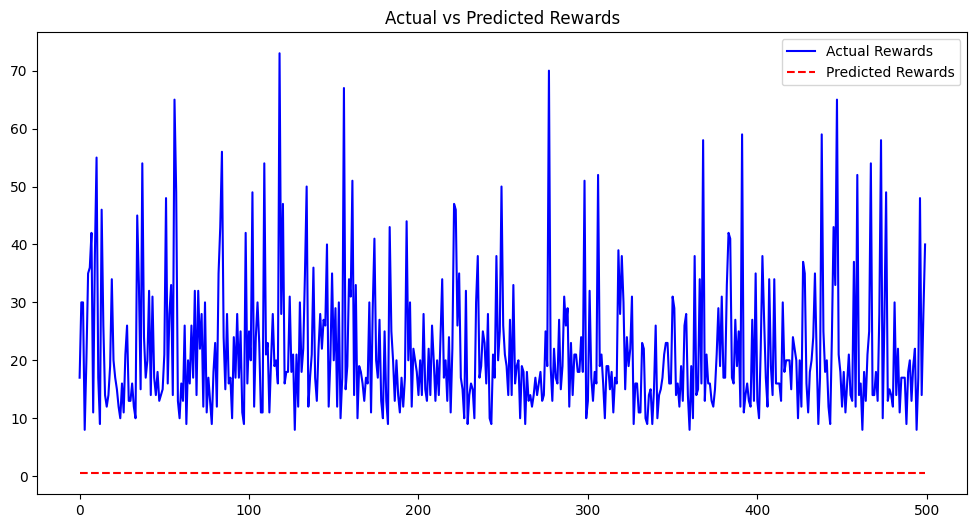


Conclusion :

Recommendation: BUY - Model predicts an upward trend.


In [24]:
import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32).clone().detach()  # Ensure proper tensor conversion
        if x.dim() == 1:
            x = x.unsqueeze(0)  # Ensure batch dimension
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=-1)

class PPOAgent:
    def __init__(self, input_dim, output_dim, lr=1e-3, gamma=0.99, eps_clip=0.2):
        self.policy = PolicyNetwork(input_dim, output_dim)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        self.gamma = gamma
        self.eps_clip = eps_clip
        self.memory = []

    def select_action(self, state):
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Ensure batch dimension
        probs = self.policy(state).squeeze(0)  # Remove extra dimension
        dist = Categorical(probs)
        action = dist.sample()
        return action.item(), dist.log_prob(action)

    def store_transition(self, transition):
        self.memory.append(transition)

    def update(self):
        if not self.memory:
            return

        states, actions, log_probs, rewards = zip(*self.memory)
        states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in states])
        actions = torch.tensor(actions, dtype=torch.int64)
        log_probs = torch.stack(log_probs)
        rewards = torch.tensor(rewards, dtype=torch.float32)

        returns = []
        discounted_sum = 0
        for reward in reversed(rewards):
            discounted_sum = reward + self.gamma * discounted_sum
            returns.insert(0, discounted_sum)
        returns = torch.tensor(returns, dtype=torch.float32)

        new_probs = self.policy(states)
        new_dist = Categorical(new_probs)
        new_log_probs = new_dist.log_prob(actions)

        ratios = torch.exp(new_log_probs - log_probs)
        advantages = returns - returns.mean()
        surrogate1 = ratios * advantages
        surrogate2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
        loss = -torch.min(surrogate1, surrogate2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        self.memory = []

# Running PPO on a sample environment
env = gym.make("CartPole-v1")
agent = PPOAgent(input_dim=4, output_dim=2)

num_episodes = 500 # Higher number for higher accuracy
actual_rewards = []
predicted_rewards = []
for episode in range(num_episodes):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]  # Handle environments returning (state, info)
    state = state.tolist()  # Ensure proper format
    episode_reward = 0

    for _ in range(200):
        action, log_prob = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)  # Corrected tuple unpacking
        next_state = next_state.tolist()
        agent.store_transition((state, action, log_prob, reward))
        state = next_state
        episode_reward += reward
        if done:
            break

    agent.update()
    actual_rewards.append(episode_reward)
    predicted_rewards.append(agent.policy(torch.tensor(state, dtype=torch.float32)).detach().numpy().mean())
    print(f"Episode {episode+1}: Reward = {episode_reward}")

# Compare actual vs predicted rewards
print(f"\n\n{stock_ticker} Price Prediction using Proximal Policy Optimization (PPO) :\n")
plt.figure(figsize=(12,6))
plt.plot(actual_rewards, label='Actual Rewards', color='blue')
plt.plot(predicted_rewards, label='Predicted Rewards', color='red', linestyle='dashed')
plt.title("Actual vs Predicted Rewards")
plt.legend()
plt.show()

# Conclusion on buy or sell
print("\nConclusion :\n")
diff = actual_rewards[-1] - predicted_rewards[-1]
if diff > 0:
    print("Recommendation: BUY - Model predicts an upward trend.")
    ppo_model = "Buy"
elif diff < 0:
    print("Recommendation: SELL - Model predicts a downward trend.")
    ppo_model = "Sell"
else:
    print("Recommendation: HOLD - Model shows stability.")
    ppo_model = "Hold"

# A2C (Advantage Actor-Critic)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 1: Total Reward = 15.0
Episode 2: Total Reward = 15.0
Episode 3: Total Reward = 21.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 4: Total Reward = 35.0
Episode 5: Total Reward = 23.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 6: Total Reward = 20.0
Episode 7: Total Reward = 22.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 8: Total Reward = 64.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 9: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 10: Total Reward = 24.0
Episode 11: Total Reward = 17.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 12: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 13: Total Reward = 10.0
Episode 14: Total Reward = 9.0
Episode 15: Total Reward = 9.0
Episode 16: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 17: Total Reward = 9.0
Episode 18: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 19: Total Reward = 10.0
Episode 20: Total Reward = 22.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 21: Total Reward = 14.0
Episode 22: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 23: Total Reward = 14.0
Episode 24: Total Reward = 17.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 25: Total Reward = 22.0
Episode 26: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 27: Total Reward = 10.0
Episode 28: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 29: Total Reward = 31.0
Episode 30: Total Reward = 25.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 31: Total Reward = 9.0
Episode 32: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 33: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 34: Total Reward = 13.0
Episode 35: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 36: Total Reward = 22.0
Episode 37: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 38: Total Reward = 13.0
Episode 39: Total Reward = 17.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 40: Total Reward = 11.0
Episode 41: Total Reward = 22.0
Episode 42: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 43: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 44: Total Reward = 36.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 45: Total Reward = 17.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 46: Total Reward = 62.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 47: Total Reward = 29.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 48: Total Reward = 21.0
Episode 49: Total Reward = 13.0
Episode 50: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 51: Total Reward = 12.0
Episode 52: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 53: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 54: Total Reward = 21.0
Episode 55: Total Reward = 9.0
Episode 56: Total Reward = 11.0
Episode 57: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 58: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 59: Total Reward = 27.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 60: Total Reward = 12.0
Episode 61: Total Reward = 11.0
Episode 62: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 63: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 64: Total Reward = 26.0
Episode 65: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 66: Total Reward = 14.0
Episode 67: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 68: Total Reward = 12.0
Episode 69: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 70: Total Reward = 31.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 71: Total Reward = 29.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 72: Total Reward = 21.0
Episode 73: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 74: Total Reward = 12.0
Episode 75: Total Reward = 10.0
Episode 76: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 77: Total Reward = 19.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 78: Total Reward = 22.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 79: Total Reward = 20.0
Episode 80: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 81: Total Reward = 16.0
Episode 82: Total Reward = 14.0
Episode 83: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 84: Total Reward = 9.0
Episode 85: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 86: Total Reward = 14.0
Episode 87: Total Reward = 9.0
Episode 88: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 89: Total Reward = 13.0
Episode 90: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 91: Total Reward = 17.0
Episode 92: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 93: Total Reward = 32.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 94: Total Reward = 17.0
Episode 95: Total Reward = 15.0
Episode 96: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 97: Total Reward = 9.0
Episode 98: Total Reward = 10.0
Episode 99: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 100: Total Reward = 11.0
Episode 101: Total Reward = 12.0
Episode 102: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 103: Total Reward = 11.0
Episode 104: Total Reward = 10.0
Episode 105: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 106: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 107: Total Reward = 26.0
Episode 108: Total Reward = 14.0
Episode 109: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 110: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 111: Total Reward = 15.0
Episode 112: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 113: Total Reward = 20.0
Episode 114: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 115: Total Reward = 10.0
Episode 116: Total Reward = 14.0
Episode 117: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 118: Total Reward = 11.0
Episode 119: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 120: Total Reward = 14.0
Episode 121: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 122: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 123: Total Reward = 28.0
Episode 124: Total Reward = 19.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 125: Total Reward = 11.0
Episode 126: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 127: Total Reward = 8.0
Episode 128: Total Reward = 12.0
Episode 129: Total Reward = 23.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 130: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 131: Total Reward = 21.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 132: Total Reward = 22.0
Episode 133: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 134: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 135: Total Reward = 22.0
Episode 136: Total Reward = 10.0
Episode 137: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 138: Total Reward = 20.0
Episode 139: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 140: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 141: Total Reward = 9.0
Episode 142: Total Reward = 8.0
Episode 143: Total Reward = 11.0
Episode 144: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 145: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 146: Total Reward = 19.0
Episode 147: Total Reward = 11.0
Episode 148: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 149: Total Reward = 14.0
Episode 150: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 151: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 152: Total Reward = 24.0
Episode 153: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 154: Total Reward = 9.0
Episode 155: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 156: Total Reward = 19.0
Episode 157: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 158: Total Reward = 28.0
Episode 159: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 160: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 161: Total Reward = 18.0
Episode 162: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 163: Total Reward = 8.0
Episode 164: Total Reward = 21.0
Episode 165: Total Reward = 10.0
Episode 166: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 167: Total Reward = 36.0
Episode 168: Total Reward = 13.0
Episode 169: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 170: Total Reward = 20.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 171: Total Reward = 10.0
Episode 172: Total Reward = 13.0
Episode 173: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 174: Total Reward = 16.0
Episode 175: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 176: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 177: Total Reward = 40.0
Episode 178: Total Reward = 10.0
Episode 179: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 180: Total Reward = 13.0
Episode 181: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 182: Total Reward = 10.0
Episode 183: Total Reward = 14.0
Episode 184: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 185: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 186: Total Reward = 19.0
Episode 187: Total Reward = 21.0
Episode 188: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 189: Total Reward = 11.0
Episode 190: Total Reward = 10.0
Episode 191: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 192: Total Reward = 19.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 193: Total Reward = 15.0
Episode 194: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 195: Total Reward = 18.0
Episode 196: Total Reward = 11.0
Episode 197: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 198: Total Reward = 22.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 199: Total Reward = 13.0
Episode 200: Total Reward = 24.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 201: Total Reward = 14.0
Episode 202: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 203: Total Reward = 24.0
Episode 204: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 205: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 206: Total Reward = 11.0
Episode 207: Total Reward = 13.0
Episode 208: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 209: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 210: Total Reward = 15.0
Episode 211: Total Reward = 9.0
Episode 212: Total Reward = 17.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 213: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 214: Total Reward = 24.0
Episode 215: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 216: Total Reward = 15.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 217: Total Reward = 18.0
Episode 218: Total Reward = 10.0
Episode 219: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 220: Total Reward = 28.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 221: Total Reward = 37.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 222: Total Reward = 18.0
Episode 223: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 224: Total Reward = 26.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 225: Total Reward = 14.0
Episode 226: Total Reward = 20.0
Episode 227: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 228: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 229: Total Reward = 15.0
Episode 230: Total Reward = 9.0
Episode 231: Total Reward = 10.0
Episode 232: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 233: Total Reward = 11.0
Episode 234: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 235: Total Reward = 9.0
Episode 236: Total Reward = 13.0
Episode 237: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 238: Total Reward = 9.0
Episode 239: Total Reward = 11.0
Episode 240: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 241: Total Reward = 10.0
Episode 242: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 243: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 244: Total Reward = 21.0
Episode 245: Total Reward = 22.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 246: Total Reward = 10.0
Episode 247: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 248: Total Reward = 13.0
Episode 249: Total Reward = 16.0
Episode 250: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 251: Total Reward = 10.0
Episode 252: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 253: Total Reward = 16.0
Episode 254: Total Reward = 10.0
Episode 255: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 256: Total Reward = 10.0
Episode 257: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 258: Total Reward = 10.0
Episode 259: Total Reward = 11.0
Episode 260: Total Reward = 9.0
Episode 261: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 262: Total Reward = 9.0
Episode 263: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 264: Total Reward = 11.0
Episode 265: Total Reward = 14.0
Episode 266: Total Reward = 11.0
Episode 267: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 268: Total Reward = 10.0
Episode 269: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 270: Total Reward = 12.0
Episode 271: Total Reward = 9.0
Episode 272: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 273: Total Reward = 17.0
Episode 274: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 275: Total Reward = 16.0
Episode 276: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 277: Total Reward = 24.0
Episode 278: Total Reward = 11.0
Episode 279: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 280: Total Reward = 14.0
Episode 281: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 282: Total Reward = 10.0
Episode 283: Total Reward = 14.0
Episode 284: Total Reward = 10.0
Episode 285: Total Reward = 8.0
Episode 286: Total Reward = 9.0
Episode 287: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 288: Total Reward = 14.0
Episode 289: Total Reward = 9.0
Episode 290: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 291: Total Reward = 10.0
Episode 292: Total Reward = 10.0
Episode 293: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 294: Total Reward = 9.0
Episode 295: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 296: Total Reward = 29.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 297: Total Reward = 29.0
Episode 298: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 299: Total Reward = 10.0
Episode 300: Total Reward = 9.0
Episode 301: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 302: Total Reward = 14.0
Episode 303: Total Reward = 11.0
Episode 304: Total Reward = 11.0
Episode 305: Total Reward = 9.0
Episode 306: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 307: Total Reward = 9.0
Episode 308: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 309: Total Reward = 16.0
Episode 310: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 311: Total Reward = 10.0
Episode 312: Total Reward = 19.0
Episode 313: Total Reward = 10.0
Episode 314: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 315: Total Reward = 10.0
Episode 316: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 317: Total Reward = 14.0
Episode 318: Total Reward = 10.0
Episode 319: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 320: Total Reward = 11.0
Episode 321: Total Reward = 32.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 322: Total Reward = 20.0
Episode 323: Total Reward = 10.0
Episode 324: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 325: Total Reward = 10.0
Episode 326: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 327: Total Reward = 11.0
Episode 328: Total Reward = 12.0
Episode 329: Total Reward = 9.0
Episode 330: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 331: Total Reward = 10.0
Episode 332: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 333: Total Reward = 10.0
Episode 334: Total Reward = 13.0
Episode 335: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 336: Total Reward = 9.0
Episode 337: Total Reward = 9.0
Episode 338: Total Reward = 9.0
Episode 339: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 340: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 341: Total Reward = 22.0
Episode 342: Total Reward = 9.0
Episode 343: Total Reward = 10.0
Episode 344: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 345: Total Reward = 10.0
Episode 346: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 347: Total Reward = 10.0
Episode 348: Total Reward = 18.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 349: Total Reward = 9.0
Episode 350: Total Reward = 21.0
Episode 351: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 352: Total Reward = 13.0
Episode 353: Total Reward = 10.0
Episode 354: Total Reward = 10.0
Episode 355: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 356: Total Reward = 9.0
Episode 357: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 358: Total Reward = 18.0
Episode 359: Total Reward = 10.0
Episode 360: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 361: Total Reward = 10.0
Episode 362: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 363: Total Reward = 10.0
Episode 364: Total Reward = 9.0
Episode 365: Total Reward = 10.0
Episode 366: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 367: Total Reward = 9.0
Episode 368: Total Reward = 10.0
Episode 369: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 370: Total Reward = 10.0
Episode 371: Total Reward = 10.0
Episode 372: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 373: Total Reward = 10.0
Episode 374: Total Reward = 9.0
Episode 375: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 376: Total Reward = 13.0
Episode 377: Total Reward = 9.0
Episode 378: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 379: Total Reward = 8.0
Episode 380: Total Reward = 13.0
Episode 381: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 382: Total Reward = 11.0
Episode 383: Total Reward = 10.0
Episode 384: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 385: Total Reward = 9.0
Episode 386: Total Reward = 10.0
Episode 387: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 388: Total Reward = 10.0
Episode 389: Total Reward = 10.0
Episode 390: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 391: Total Reward = 13.0
Episode 392: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 393: Total Reward = 13.0
Episode 394: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 395: Total Reward = 8.0
Episode 396: Total Reward = 10.0
Episode 397: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 398: Total Reward = 11.0
Episode 399: Total Reward = 10.0
Episode 400: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 401: Total Reward = 9.0
Episode 402: Total Reward = 10.0
Episode 403: Total Reward = 8.0
Episode 404: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 405: Total Reward = 9.0
Episode 406: Total Reward = 10.0
Episode 407: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 408: Total Reward = 8.0
Episode 409: Total Reward = 9.0
Episode 410: Total Reward = 9.0
Episode 411: Total Reward = 9.0
Episode 412: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 413: Total Reward = 8.0
Episode 414: Total Reward = 9.0
Episode 415: Total Reward = 10.0
Episode 416: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 417: Total Reward = 9.0
Episode 418: Total Reward = 10.0
Episode 419: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 420: Total Reward = 9.0
Episode 421: Total Reward = 10.0
Episode 422: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 423: Total Reward = 16.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 424: Total Reward = 10.0
Episode 425: Total Reward = 10.0
Episode 426: Total Reward = 11.0
Episode 427: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 428: Total Reward = 9.0
Episode 429: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 430: Total Reward = 9.0
Episode 431: Total Reward = 10.0
Episode 432: Total Reward = 14.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 433: Total Reward = 8.0
Episode 434: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 435: Total Reward = 8.0
Episode 436: Total Reward = 9.0
Episode 437: Total Reward = 10.0
Episode 438: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 439: Total Reward = 9.0
Episode 440: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 441: Total Reward = 10.0
Episode 442: Total Reward = 11.0
Episode 443: Total Reward = 9.0
Episode 444: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 445: Total Reward = 8.0
Episode 446: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 447: Total Reward = 9.0
Episode 448: Total Reward = 10.0
Episode 449: Total Reward = 17.0
Episode 450: Total Reward = 10.0
Episode 451: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 452: Total Reward = 9.0
Episode 453: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 454: Total Reward = 10.0
Episode 455: Total Reward = 10.0
Episode 456: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 457: Total Reward = 10.0
Episode 458: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 459: Total Reward = 10.0
Episode 460: Total Reward = 8.0
Episode 461: Total Reward = 9.0
Episode 462: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 463: Total Reward = 10.0
Episode 464: Total Reward = 8.0
Episode 465: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 466: Total Reward = 9.0
Episode 467: Total Reward = 9.0
Episode 468: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 469: Total Reward = 10.0
Episode 470: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 471: Total Reward = 9.0
Episode 472: Total Reward = 10.0
Episode 473: Total Reward = 10.0
Episode 474: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 475: Total Reward = 12.0
Episode 476: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 477: Total Reward = 8.0
Episode 478: Total Reward = 9.0
Episode 479: Total Reward = 9.0
Episode 480: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 481: Total Reward = 10.0
Episode 482: Total Reward = 11.0
Episode 483: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 484: Total Reward = 10.0
Episode 485: Total Reward = 8.0
Episode 486: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 487: Total Reward = 10.0
Episode 488: Total Reward = 9.0
Episode 489: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 490: Total Reward = 10.0
Episode 491: Total Reward = 8.0
Episode 492: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 493: Total Reward = 10.0
Episode 494: Total Reward = 9.0
Episode 495: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 496: Total Reward = 11.0
Episode 497: Total Reward = 9.0
Episode 498: Total Reward = 9.0
Episode 499: Total Reward = 9.0
Episode 500: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 501: Total Reward = 9.0
Episode 502: Total Reward = 9.0
Episode 503: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 504: Total Reward = 10.0
Episode 505: Total Reward = 10.0
Episode 506: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 507: Total Reward = 11.0
Episode 508: Total Reward = 8.0
Episode 509: Total Reward = 9.0
Episode 510: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 511: Total Reward = 9.0
Episode 512: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 513: Total Reward = 9.0
Episode 514: Total Reward = 9.0
Episode 515: Total Reward = 9.0
Episode 516: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 517: Total Reward = 9.0
Episode 518: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 519: Total Reward = 9.0
Episode 520: Total Reward = 9.0
Episode 521: Total Reward = 10.0
Episode 522: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 523: Total Reward = 11.0
Episode 524: Total Reward = 9.0
Episode 525: Total Reward = 10.0
Episode 526: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 527: Total Reward = 9.0
Episode 528: Total Reward = 9.0
Episode 529: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 530: Total Reward = 9.0
Episode 531: Total Reward = 10.0
Episode 532: Total Reward = 8.0
Episode 533: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 534: Total Reward = 10.0
Episode 535: Total Reward = 10.0
Episode 536: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 537: Total Reward = 10.0
Episode 538: Total Reward = 9.0
Episode 539: Total Reward = 9.0
Episode 540: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 541: Total Reward = 10.0
Episode 542: Total Reward = 9.0
Episode 543: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 544: Total Reward = 9.0
Episode 545: Total Reward = 8.0
Episode 546: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 547: Total Reward = 10.0
Episode 548: Total Reward = 10.0
Episode 549: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 550: Total Reward = 9.0
Episode 551: Total Reward = 9.0
Episode 552: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 553: Total Reward = 10.0
Episode 554: Total Reward = 9.0
Episode 555: Total Reward = 9.0
Episode 556: Total Reward = 8.0
Episode 557: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 558: Total Reward = 10.0
Episode 559: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 560: Total Reward = 9.0
Episode 561: Total Reward = 10.0
Episode 562: Total Reward = 9.0
Episode 563: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 564: Total Reward = 9.0
Episode 565: Total Reward = 9.0
Episode 566: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 567: Total Reward = 8.0
Episode 568: Total Reward = 9.0
Episode 569: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 570: Total Reward = 9.0
Episode 571: Total Reward = 9.0
Episode 572: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 573: Total Reward = 10.0
Episode 574: Total Reward = 9.0
Episode 575: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 576: Total Reward = 9.0
Episode 577: Total Reward = 9.0
Episode 578: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 579: Total Reward = 10.0
Episode 580: Total Reward = 8.0
Episode 581: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 582: Total Reward = 11.0
Episode 583: Total Reward = 12.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 584: Total Reward = 9.0
Episode 585: Total Reward = 9.0
Episode 586: Total Reward = 9.0
Episode 587: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 588: Total Reward = 10.0
Episode 589: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 590: Total Reward = 9.0
Episode 591: Total Reward = 9.0
Episode 592: Total Reward = 10.0
Episode 593: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 594: Total Reward = 8.0
Episode 595: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 596: Total Reward = 9.0
Episode 597: Total Reward = 9.0
Episode 598: Total Reward = 10.0
Episode 599: Total Reward = 9.0
Episode 600: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 601: Total Reward = 10.0
Episode 602: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 603: Total Reward = 10.0
Episode 604: Total Reward = 10.0
Episode 605: Total Reward = 9.0
Episode 606: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 607: Total Reward = 10.0
Episode 608: Total Reward = 9.0
Episode 609: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 610: Total Reward = 10.0
Episode 611: Total Reward = 10.0
Episode 612: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 613: Total Reward = 11.0
Episode 614: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 615: Total Reward = 10.0
Episode 616: Total Reward = 9.0
Episode 617: Total Reward = 8.0
Episode 618: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 619: Total Reward = 9.0
Episode 620: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 621: Total Reward = 9.0
Episode 622: Total Reward = 10.0
Episode 623: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 624: Total Reward = 10.0
Episode 625: Total Reward = 10.0
Episode 626: Total Reward = 10.0
Episode 627: Total Reward = 9.0
Episode 628: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 629: Total Reward = 9.0
Episode 630: Total Reward = 8.0
Episode 631: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 632: Total Reward = 9.0
Episode 633: Total Reward = 9.0
Episode 634: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 635: Total Reward = 10.0
Episode 636: Total Reward = 9.0
Episode 637: Total Reward = 9.0
Episode 638: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 639: Total Reward = 9.0
Episode 640: Total Reward = 8.0
Episode 641: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 642: Total Reward = 9.0
Episode 643: Total Reward = 10.0
Episode 644: Total Reward = 10.0
Episode 645: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 646: Total Reward = 9.0
Episode 647: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 648: Total Reward = 9.0
Episode 649: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 650: Total Reward = 10.0
Episode 651: Total Reward = 9.0
Episode 652: Total Reward = 10.0
Episode 653: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 654: Total Reward = 9.0
Episode 655: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 656: Total Reward = 10.0
Episode 657: Total Reward = 10.0
Episode 658: Total Reward = 8.0
Episode 659: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 660: Total Reward = 10.0
Episode 661: Total Reward = 10.0
Episode 662: Total Reward = 9.0
Episode 663: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 664: Total Reward = 8.0
Episode 665: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 666: Total Reward = 9.0
Episode 667: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 668: Total Reward = 13.0
Episode 669: Total Reward = 9.0
Episode 670: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 671: Total Reward = 9.0
Episode 672: Total Reward = 8.0
Episode 673: Total Reward = 9.0
Episode 674: Total Reward = 9.0
Episode 675: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 676: Total Reward = 9.0
Episode 677: Total Reward = 13.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 678: Total Reward = 9.0
Episode 679: Total Reward = 9.0
Episode 680: Total Reward = 9.0
Episode 681: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 682: Total Reward = 9.0
Episode 683: Total Reward = 10.0
Episode 684: Total Reward = 10.0
Episode 685: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 686: Total Reward = 8.0
Episode 687: Total Reward = 9.0
Episode 688: Total Reward = 9.0
Episode 689: Total Reward = 10.0
Episode 690: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 691: Total Reward = 9.0
Episode 692: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 693: Total Reward = 8.0
Episode 694: Total Reward = 8.0
Episode 695: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 696: Total Reward = 9.0
Episode 697: Total Reward = 10.0
Episode 698: Total Reward = 10.0
Episode 699: Total Reward = 8.0
Episode 700: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 701: Total Reward = 10.0
Episode 702: Total Reward = 8.0
Episode 703: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 704: Total Reward = 9.0
Episode 705: Total Reward = 9.0
Episode 706: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 707: Total Reward = 9.0
Episode 708: Total Reward = 9.0
Episode 709: Total Reward = 9.0
Episode 710: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 711: Total Reward = 10.0
Episode 712: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 713: Total Reward = 10.0
Episode 714: Total Reward = 10.0
Episode 715: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 716: Total Reward = 10.0
Episode 717: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 718: Total Reward = 10.0
Episode 719: Total Reward = 9.0
Episode 720: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 721: Total Reward = 9.0
Episode 722: Total Reward = 9.0
Episode 723: Total Reward = 10.0
Episode 724: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 725: Total Reward = 9.0
Episode 726: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 727: Total Reward = 10.0
Episode 728: Total Reward = 9.0
Episode 729: Total Reward = 10.0
Episode 730: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 731: Total Reward = 11.0
Episode 732: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 733: Total Reward = 9.0
Episode 734: Total Reward = 9.0
Episode 735: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 736: Total Reward = 8.0
Episode 737: Total Reward = 9.0
Episode 738: Total Reward = 9.0
Episode 739: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 740: Total Reward = 8.0
Episode 741: Total Reward = 10.0
Episode 742: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 743: Total Reward = 10.0
Episode 744: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 745: Total Reward = 10.0
Episode 746: Total Reward = 9.0
Episode 747: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 748: Total Reward = 9.0
Episode 749: Total Reward = 9.0
Episode 750: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 751: Total Reward = 8.0
Episode 752: Total Reward = 10.0
Episode 753: Total Reward = 9.0
Episode 754: Total Reward = 8.0
Episode 755: Total Reward = 10.0
Episode 756: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 757: Total Reward = 9.0
Episode 758: Total Reward = 10.0
Episode 759: Total Reward = 10.0
Episode 760: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 761: Total Reward = 10.0
Episode 762: Total Reward = 10.0
Episode 763: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 764: Total Reward = 11.0
Episode 765: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 766: Total Reward = 10.0
Episode 767: Total Reward = 9.0
Episode 768: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 769: Total Reward = 10.0
Episode 770: Total Reward = 10.0
Episode 771: Total Reward = 10.0
Episode 772: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 773: Total Reward = 9.0
Episode 774: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 775: Total Reward = 10.0
Episode 776: Total Reward = 10.0
Episode 777: Total Reward = 8.0
Episode 778: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 779: Total Reward = 9.0
Episode 780: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 781: Total Reward = 9.0
Episode 782: Total Reward = 9.0
Episode 783: Total Reward = 10.0
Episode 784: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 785: Total Reward = 10.0
Episode 786: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 787: Total Reward = 8.0
Episode 788: Total Reward = 9.0
Episode 789: Total Reward = 9.0
Episode 790: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 791: Total Reward = 10.0
Episode 792: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 793: Total Reward = 9.0
Episode 794: Total Reward = 8.0
Episode 795: Total Reward = 11.0
Episode 796: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 797: Total Reward = 9.0
Episode 798: Total Reward = 10.0
Episode 799: Total Reward = 9.0
Episode 800: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 801: Total Reward = 9.0
Episode 802: Total Reward = 10.0
Episode 803: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 804: Total Reward = 10.0
Episode 805: Total Reward = 10.0
Episode 806: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 807: Total Reward = 10.0
Episode 808: Total Reward = 9.0
Episode 809: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 810: Total Reward = 10.0
Episode 811: Total Reward = 9.0
Episode 812: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 813: Total Reward = 9.0
Episode 814: Total Reward = 9.0
Episode 815: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 816: Total Reward = 9.0
Episode 817: Total Reward = 9.0
Episode 818: Total Reward = 9.0
Episode 819: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 820: Total Reward = 10.0
Episode 821: Total Reward = 9.0
Episode 822: Total Reward = 10.0
Episode 823: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 824: Total Reward = 10.0
Episode 825: Total Reward = 8.0
Episode 826: Total Reward = 10.0
Episode 827: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 828: Total Reward = 8.0
Episode 829: Total Reward = 9.0
Episode 830: Total Reward = 8.0
Episode 831: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 832: Total Reward = 10.0
Episode 833: Total Reward = 10.0
Episode 834: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 835: Total Reward = 9.0
Episode 836: Total Reward = 10.0
Episode 837: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 838: Total Reward = 10.0
Episode 839: Total Reward = 9.0
Episode 840: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 841: Total Reward = 9.0
Episode 842: Total Reward = 10.0
Episode 843: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 844: Total Reward = 10.0
Episode 845: Total Reward = 10.0
Episode 846: Total Reward = 10.0
Episode 847: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 848: Total Reward = 11.0
Episode 849: Total Reward = 9.0
Episode 850: Total Reward = 9.0
Episode 851: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 852: Total Reward = 8.0
Episode 853: Total Reward = 8.0
Episode 854: Total Reward = 9.0
Episode 855: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 856: Total Reward = 8.0
Episode 857: Total Reward = 10.0
Episode 858: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 859: Total Reward = 10.0
Episode 860: Total Reward = 9.0
Episode 861: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 862: Total Reward = 9.0
Episode 863: Total Reward = 10.0
Episode 864: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 865: Total Reward = 10.0
Episode 866: Total Reward = 8.0
Episode 867: Total Reward = 9.0
Episode 868: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 869: Total Reward = 9.0
Episode 870: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 871: Total Reward = 8.0
Episode 872: Total Reward = 10.0
Episode 873: Total Reward = 8.0
Episode 874: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 875: Total Reward = 10.0
Episode 876: Total Reward = 10.0
Episode 877: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 878: Total Reward = 10.0
Episode 879: Total Reward = 10.0
Episode 880: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 881: Total Reward = 10.0
Episode 882: Total Reward = 10.0
Episode 883: Total Reward = 9.0
Episode 884: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 885: Total Reward = 10.0
Episode 886: Total Reward = 9.0
Episode 887: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 888: Total Reward = 10.0
Episode 889: Total Reward = 9.0
Episode 890: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 891: Total Reward = 9.0
Episode 892: Total Reward = 8.0
Episode 893: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 894: Total Reward = 10.0
Episode 895: Total Reward = 10.0
Episode 896: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 897: Total Reward = 9.0
Episode 898: Total Reward = 10.0
Episode 899: Total Reward = 10.0
Episode 900: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 901: Total Reward = 10.0
Episode 902: Total Reward = 11.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 903: Total Reward = 10.0
Episode 904: Total Reward = 10.0
Episode 905: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 906: Total Reward = 9.0
Episode 907: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 908: Total Reward = 11.0
Episode 909: Total Reward = 10.0
Episode 910: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 911: Total Reward = 8.0
Episode 912: Total Reward = 10.0
Episode 913: Total Reward = 9.0
Episode 914: Total Reward = 9.0
Episode 915: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 916: Total Reward = 9.0
Episode 917: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 918: Total Reward = 10.0
Episode 919: Total Reward = 10.0
Episode 920: Total Reward = 10.0
Episode 921: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 922: Total Reward = 8.0
Episode 923: Total Reward = 8.0
Episode 924: Total Reward = 10.0
Episode 925: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 926: Total Reward = 8.0
Episode 927: Total Reward = 10.0
Episode 928: Total Reward = 10.0
Episode 929: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 930: Total Reward = 10.0
Episode 931: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 932: Total Reward = 10.0
Episode 933: Total Reward = 9.0
Episode 934: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 935: Total Reward = 10.0
Episode 936: Total Reward = 10.0
Episode 937: Total Reward = 9.0
Episode 938: Total Reward = 10.0
Episode 939: Total Reward = 10.0
Episode 940: Total Reward = 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 941: Total Reward = 10.0
Episode 942: Total Reward = 9.0
Episode 943: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 944: Total Reward = 10.0
Episode 945: Total Reward = 10.0
Episode 946: Total Reward = 10.0
Episode 947: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 948: Total Reward = 9.0
Episode 949: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 950: Total Reward = 9.0
Episode 951: Total Reward = 10.0
Episode 952: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 953: Total Reward = 10.0
Episode 954: Total Reward = 9.0
Episode 955: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 956: Total Reward = 8.0
Episode 957: Total Reward = 9.0
Episode 958: Total Reward = 8.0
Episode 959: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 960: Total Reward = 10.0
Episode 961: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 962: Total Reward = 9.0
Episode 963: Total Reward = 10.0
Episode 964: Total Reward = 10.0
Episode 965: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 966: Total Reward = 9.0
Episode 967: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 968: Total Reward = 11.0
Episode 969: Total Reward = 10.0
Episode 970: Total Reward = 9.0
Episode 971: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 972: Total Reward = 8.0
Episode 973: Total Reward = 10.0
Episode 974: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 975: Total Reward = 10.0
Episode 976: Total Reward = 10.0
Episode 977: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 978: Total Reward = 8.0
Episode 979: Total Reward = 10.0
Episode 980: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 981: Total Reward = 9.0
Episode 982: Total Reward = 8.0
Episode 983: Total Reward = 10.0
Episode 984: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 985: Total Reward = 11.0
Episode 986: Total Reward = 9.0
Episode 987: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 988: Total Reward = 9.0
Episode 989: Total Reward = 10.0
Episode 990: Total Reward = 8.0
Episode 991: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 992: Total Reward = 9.0
Episode 993: Total Reward = 8.0
Episode 994: Total Reward = 9.0
Episode 995: Total Reward = 10.0
Episode 996: Total Reward = 9.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 997: Total Reward = 9.0
Episode 998: Total Reward = 10.0


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['actor_critic/dense_11/kernel', 'actor_critic/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Episode 999: Total Reward = 8.0
Episode 1000: Total Reward = 9.0


GOOG Price Prediction using A2C (Advantage Actor-Critic) :



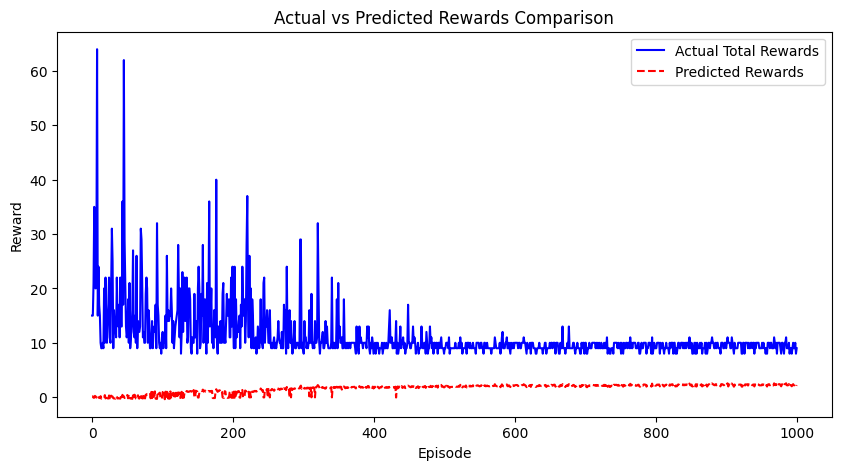


Conclusion :

Conclusion: The model suggests a SELL signal based on performance.


In [25]:
class ActorCritic(Model):
    def __init__(self, action_size):
        super(ActorCritic, self).__init__()
        self.common = Dense(128, activation='relu')
        self.actor = Dense(action_size, activation='softmax')
        self.critic = Dense(1, activation='linear')

    def call(self, inputs):
        x = self.common(inputs)
        return self.actor(x), self.critic(x)

def get_action(policy):
    policy = np.squeeze(policy.numpy())  # Remove unnecessary dimensions
    policy = np.nan_to_num(policy, nan=0.0)  # Replace NaNs with 0
    policy = policy / np.sum(policy)  # Normalize to sum to 1
    return np.random.choice(len(policy), p=policy)

env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
model = ActorCritic(action_size)
optimizer = Adam(learning_rate=0.001)

gamma = 0.99
total_rewards = []
predicted_rewards = []
for episode in range(1000): # Higher number for higher accuracy
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    done = False
    while not done:
        policy, value = model(state)
        action = get_action(policy)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        _, next_value = model(next_state)
        target = reward + (1 - done) * gamma * next_value
        advantage = target - value

        with tf.GradientTape() as tape:
            policy, value = model(state)
            action_prob = tf.gather(policy[0], action)
            log_prob = tf.math.log(action_prob + 1e-10)
            actor_loss = -log_prob * advantage
            critic_loss = advantage ** 2
            loss = actor_loss + critic_loss

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        state = next_state
        total_reward += reward
    total_rewards.append(total_reward)
    predicted_rewards.append(value.numpy()[0][0])
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

env.close()

# Plot rewards
print(f"\n\n{stock_ticker} Price Prediction using A2C (Advantage Actor-Critic) :\n")
plt.figure(figsize=(10,5))
plt.plot(total_rewards, label='Actual Total Rewards', color='blue')
plt.plot(predicted_rewards, label='Predicted Rewards', color='red', linestyle='dashed')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Actual vs Predicted Rewards Comparison')
plt.legend()
plt.show()

# Final Conclusion
print("\nConclusion :\n")
average_reward = np.mean(total_rewards[-50:])
if average_reward > 195:
    print("Conclusion: The model suggests a BUY signal based on performance.")
    a2c_model = "Buy"
else:
    print("Conclusion: The model suggests a SELL signal based on performance.")
    a2c_model = "Sell"

# Stacking (Ensemble of ML models)



Stacking Model MSE: 0.004055013189960975

GOOG Price Prediction using Stacking Ensemble :



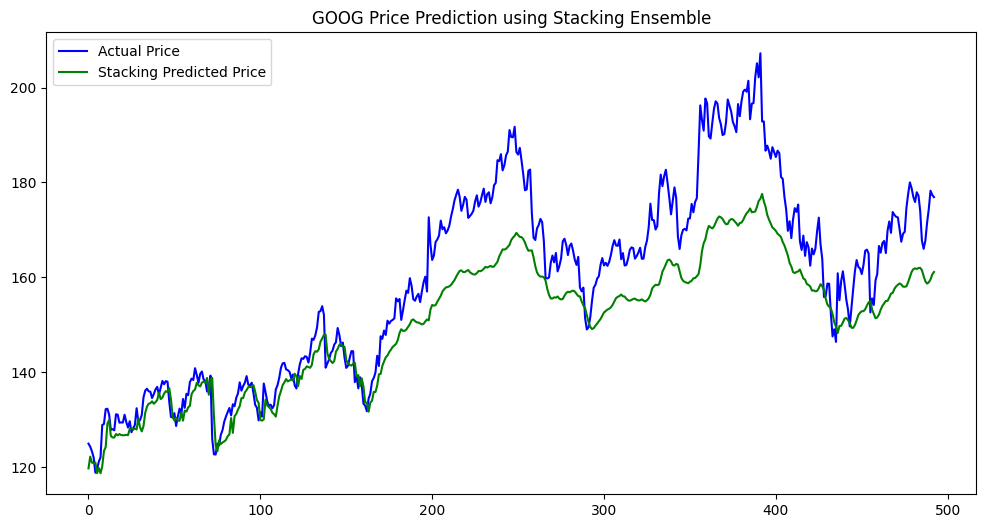


Conclusion:

Bearish Signal: The stacking model predicts a downward trend in GOOG's stock price. This indicates possible market corrections or a decline, urging investors to be cautious.


In [26]:
# Define base models
base_models = [
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor(n_estimators=100)),
    ('svr', SVR())
]

# Define meta model
meta_model = Ridge()

# Create stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stacking_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict using stacking model
y_pred_stacking = stacking_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate error
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"\n\nStacking Model MSE: {mse_stacking}")

# Plot predictions
print(f"\n{stock_ticker} Price Prediction using Stacking Ensemble :\n")
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(scaler.inverse_transform(y_pred_stacking.reshape(-1, 1)), label='Stacking Predicted Price', color='green')
plt.title(f"{stock_ticker} Price Prediction using Stacking Ensemble")
plt.legend()
plt.show()

# Conclusion
print("\nConclusion:\n")
if y_pred_stacking[-1] > y_test[-1]:
    print(f"Bullish Signal: The stacking model predicts an upward trend in {stock_ticker}'s stock price. This suggests positive momentum and potential growth, making it a favorable opportunity for investors.")
    stacking_model = "Buy"
else:
    print(f"Bearish Signal: The stacking model predicts a downward trend in {stock_ticker}'s stock price. This indicates possible market corrections or a decline, urging investors to be cautious.")
    stacking_model = "Sell"


# CNN + LSTM model


CNN + LSTM :

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0119 - val_loss: 0.0026
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 7.1241e-04 - val_loss: 0.0028
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 6.2350e-04 - val_loss: 0.0022
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 5.5817e-04 - val_loss: 0.0035
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 5.4028e-04 - val_loss: 0.0012
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.6494e-04 - val_loss: 0.0012
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 3.9665e-04 - val_loss: 0.0012
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 5.8994e-04 - val_loss: 0.0016
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 2.7505e-04 - val_loss: 0.0016
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 2.5486e-04 - val_loss: 9.5698e-04
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 2.3655e-04 - val_loss: 0.0014
Epoch 1

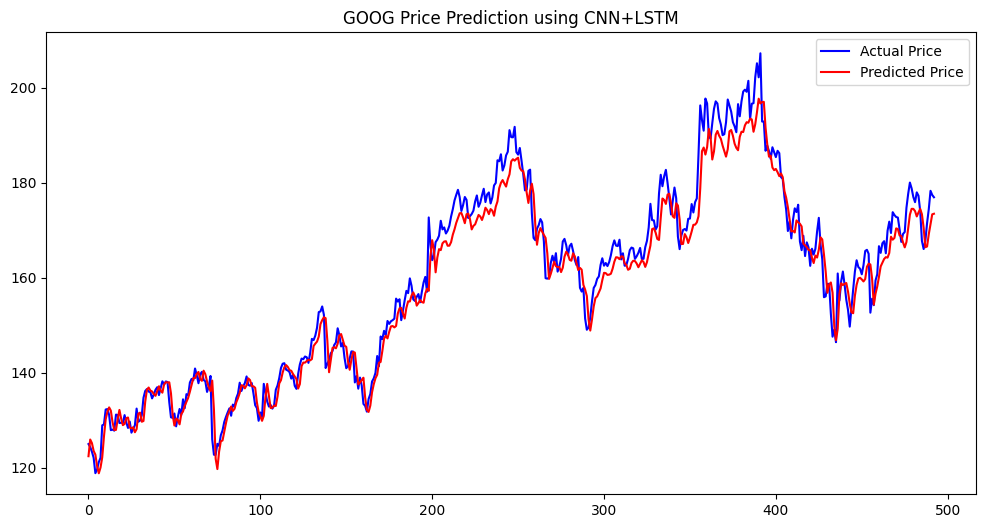


Conclusion :

Root Mean Squared Error: 4.053487337184529
Predicted trend suggests: SELL




In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

print("\nCNN + LSTM :\n")

# Prepare data for CNN+LSTM model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(history[['Close']].dropna())

# Function to create sequences for time series forecasting
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50  # Sequence length for LSTM input
X, y = create_sequences(scaled_data, seq_length)
X = np.expand_dims(X, axis=2)  # Reshape for Conv1D

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define CNN + LSTM Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test)) # Higher number for higher accuracy

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print(f"\n{stock_ticker} Price Prediction using CNN+LSTM\n")
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title(f"{stock_ticker} Price Prediction using CNN+LSTM")
plt.legend()
plt.show()

# Calculate RMSE for performance evaluation
print("\nConclusion :\n")
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error: {rmse}")

# Buy/Sell Decision based on trend
if predictions[-1] > y_test_actual[-1]:
    decision = "BUY"
else:
    decision = "SELL"

print(f"Predicted trend suggests: {decision}\n\n")
cnn_lstm_model = decision

# Final Output

In [28]:
print(f"Final Decision for {stock_ticker} based on all analysis :\n")
print(f"Fundamental Analysis : {fundamental_analysis.split()[0].upper()}")
print(f"Technical Analysis : {technical_analysis.upper()}")
print(f"Time Series Forecasting : {time_series_forecasting.upper()}")
print(f"Linear Regression : {linear_regression_model.upper()}")
print(f"Logistic Regression : {logistic_regression_model.upper()}")
print(f"Random Forest Regressor & Classifier : {random_forest.upper()}")
print(f"Support Vector Machine (SVM) : {svm_model.upper()}")
print(f"XGBoost & LightGBM : {xgboost_lightgbm_model.upper()}")
print(f"Artificial Neural Networks (ANN) : {ann_model.upper()}")
print(f"Recurrent Neural Networks (RNN) : {rnn_model.upper()}")
print(f"Long Short-Term Memory (LSTM) : {lstm_model.upper()}")
print(f"Gated Recurrent Units (GRU) : {gru_model.upper()}")
print(f"Transformer Models : {transformer_model.upper()}")
print(f"SARIMA Model : {sarima_model.upper()}")
print(f"Prophet : {prophet_model.upper()}")
print(f"Kalman Filter : {kalman_filter_model.upper()}")
print(f"Deep Q-Network (DQN) : {dqn_model.upper()}")
print(f"Proximal Policy Optimization (PPO) : {ppo_model.upper()}")
print(f"A2C (Advantage Actor-Critic) : {a2c_model.upper()}")
print(f"Stacking Ensemble : {stacking_model.upper()}")
print(f"CNN + LSTM : {cnn_lstm_model.upper()}")

Final Decision for GOOG based on all analysis :

Fundamental Analysis : SELL
Technical Analysis : SELL
Time Series Forecasting : SELL
Linear Regression : SELL
Logistic Regression : SELL
Random Forest Regressor & Classifier : BUY
Support Vector Machine (SVM) : SELL
XGBoost & LightGBM : SELL
Artificial Neural Networks (ANN) : SELL
Recurrent Neural Networks (RNN) : SELL
Long Short-Term Memory (LSTM) : SELL
Gated Recurrent Units (GRU) : SELL
Transformer Models : SELL
SARIMA Model : SELL
Prophet : BUY
Kalman Filter : SELL
Deep Q-Network (DQN) : BUY
Proximal Policy Optimization (PPO) : BUY
A2C (Advantage Actor-Critic) : SELL
Stacking Ensemble : SELL
CNN + LSTM : SELL


In [29]:
# Store all models' predictions in a list
model_predictions = [
    fundamental_analysis.split()[0].upper(), technical_analysis.upper(), time_series_forecasting.upper(),
    linear_regression_model.upper(), logistic_regression_model.upper(), random_forest.upper(),
    svm_model.upper(), xgboost_lightgbm_model.upper(), ann_model.upper(), rnn_model.upper(), lstm_model.upper(),
    gru_model.upper(), transformer_model.upper(), sarima_model.upper(), prophet_model.upper(),
    kalman_filter_model.upper(), dqn_model.upper(), ppo_model.upper(), a2c_model.upper(),
    stacking_model.upper(), cnn_lstm_model.upper()
]

# Count occurrences of BUY, SELL, and HOLD
buy_count = sum(1 for model in model_predictions if model.upper() == "BUY")
sell_count = sum(1 for model in model_predictions if model.upper() == "SELL")
hold_count = sum(1 for model in model_predictions if model.upper() == "HOLD")

# Calculate total models used
total_models = len(model_predictions)

# Calculate probabilities
buy_prob = (buy_count / total_models) * 100
sell_prob = (sell_count / total_models) * 100
hold_prob = (hold_count / total_models) * 100

# Determine final decision
if buy_prob > sell_prob and buy_prob > hold_prob:
    final_decision = "BUY"
elif sell_prob > buy_prob and sell_prob > hold_prob:
    final_decision = "SELL"
else:
    final_decision = "HOLD"

# Print final decision with probability breakdown
print(f"Final Decision for {stock_ticker} based on all analysis:\n")
print(f"Fundamental Analysis : {fundamental_analysis.split()[0].upper()}")
print(f"Technical Analysis : {technical_analysis.upper()}")
print(f"Time Series Forecasting : {time_series_forecasting.upper()}")
print(f"Linear Regression : {linear_regression_model.upper()}")
print(f"Logistic Regression : {logistic_regression_model.upper()}")
print(f"Random Forest Regressor & Classifier : {random_forest.upper()}")
print(f"Support Vector Machine (SVM) : {svm_model.upper()}")
print(f"XGBoost & LightGBM : {xgboost_lightgbm_model.upper()}")
print(f"Artificial Neural Networks (ANN) : {ann_model.upper()}")
print(f"Recurrent Neural Networks (RNN) : {rnn_model.upper()}")
print(f"Long Short-Term Memory (LSTM) : {lstm_model.upper()}")
print(f"Gated Recurrent Units (GRU) : {gru_model.upper()}")
print(f"Transformer Models : {transformer_model.upper()}")
print(f"SARIMA Model : {sarima_model.upper()}")
print(f"Prophet : {prophet_model.upper()}")
print(f"Kalman Filter : {kalman_filter_model.upper()}")
print(f"Deep Q-Network (DQN) : {dqn_model.upper()}")
print(f"Proximal Policy Optimization (PPO) : {ppo_model.upper()}")
print(f"A2C (Advantage Actor-Critic) : {a2c_model.upper()}")
print(f"Stacking Ensemble : {stacking_model.upper()}")
print(f"CNN + LSTM : {cnn_lstm_model.upper()}")

print("\nDecision Summary :\n")
print(f"Total BUY recommendations: {buy_count}")
print(f"Total SELL recommendations: {sell_count}")
print(f"Total HOLD recommendations: {hold_count}")
print(f"Total Models used: {total_models}\n")
print(f"\nProbability of BUY : {buy_prob:.2f}%")
print(f"Probability of SELL : {sell_prob:.2f}%")
print(f"Probability of HOLD : {hold_prob:.2f}%\n")
print(f"Final Conclusion: The overall recommendation is to {final_decision} the stock.")

print("\nWarning: This is not financial advice. Please conduct your own research before making investment decisions.")

Final Decision for GOOG based on all analysis:

Fundamental Analysis : SELL
Technical Analysis : SELL
Time Series Forecasting : SELL
Linear Regression : SELL
Logistic Regression : SELL
Random Forest Regressor & Classifier : BUY
Support Vector Machine (SVM) : SELL
XGBoost & LightGBM : SELL
Artificial Neural Networks (ANN) : SELL
Recurrent Neural Networks (RNN) : SELL
Long Short-Term Memory (LSTM) : SELL
Gated Recurrent Units (GRU) : SELL
Transformer Models : SELL
SARIMA Model : SELL
Prophet : BUY
Kalman Filter : SELL
Deep Q-Network (DQN) : BUY
Proximal Policy Optimization (PPO) : BUY
A2C (Advantage Actor-Critic) : SELL
Stacking Ensemble : SELL
CNN + LSTM : SELL

Decision Summary :

Total BUY recommendations: 4
Total SELL recommendations: 17
Total HOLD recommendations: 0
Total Models used: 21


Probability of BUY : 19.05%
Probability of SELL : 80.95%
Probability of HOLD : 0.00%

Final Conclusion: The overall recommendation is to SELL the stock.



# Collect all Results and Prediction and export to csv

In [30]:
import pandas as pd
import pickle
import json
from datetime import datetime
import os

results_dir = f"stock_analysis_results_{stock_ticker}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
os.makedirs(results_dir, exist_ok=True)

model_results = {
    'Model': [
        'Fundamental Analysis',
        'Technical Analysis',
        'Time Series Forecasting (ARIMA)',
        'Linear Regression',
        'Logistic Regression',
        'Random Forest',
        'Support Vector Machine',
        'XGBoost & LightGBM',
        'Artificial Neural Network',
        'Recurrent Neural Network',
        'Long Short-Term Memory',
        'Gated Recurrent Unit',
        'Transformer',
        'SARIMA',
        'Prophet',
        'Kalman Filter',
        'Deep Q-Network',
        'Proximal Policy Optimization',
        'Actor-Critic',
        'Stacking Ensemble',
        'CNN-LSTM Hybrid'
    ],
    'Prediction': [
        fundamental_analysis,
        technical_analysis,
        time_series_forecasting,
        linear_regression_model,
        logistic_regression_model,
        random_forest,
        svm_model,
        xgboost_lightgbm_model,
        ann_model,
        rnn_model,
        lstm_model,
        gru_model,
        transformer_model,
        sarima_model,
        prophet_model,
        kalman_filter_model,
        dqn_model,
        ppo_model,
        a2c_model,
        stacking_model,
        cnn_lstm_model
    ]
}

summary_stats = {
    'Stock Ticker': stock_ticker,
    'Analysis Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'Total Models': total_models,
    'BUY Predictions': buy_count,
    'SELL Predictions': sell_count,
    'HOLD Predictions': hold_count,
    'BUY Probability (%)': round(buy_prob, 2),
    'SELL Probability (%)': round(sell_prob, 2),
    'HOLD Probability (%)': round(hold_prob, 2),
    'Final Decision': final_decision,
    'Current Stock Price': round(history['Close'].iloc[-1], 2),
    'Data Period': '10 Years'
}

fundamentals_data = fundamentals.copy() if fundamentals else {}

available_columns = ['Close', 'Volume']
recent_prices_cols = [col for col in available_columns if col in history.columns]
recent_prices = history[recent_prices_cols].tail(30).copy()
if 'Date' not in recent_prices.columns and 'Date' in history.columns:
    recent_prices['Date'] = recent_prices.index
recent_prices = recent_prices.reset_index(drop=True)
print("Exporting to CSV format...")

predictions_df = pd.DataFrame(model_results)
predictions_df.to_csv(f'{results_dir}/model_predictions.csv', index=False)

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv(f'{results_dir}/summary_statistics.csv', index=False)

if fundamentals_data:
    fundamentals_df = pd.DataFrame([fundamentals_data])
    fundamentals_df.to_csv(f'{results_dir}/fundamental_data.csv', index=False)

recent_prices.to_csv(f'{results_dir}/recent_stock_prices.csv', index=False)

combined_data = {
    'Analysis_Summary': [summary_stats],
    'Model_Predictions': model_results,
    'Fundamentals': [fundamentals_data] if fundamentals_data else [{}],
    'Recent_Prices_Sample': recent_prices.head(5).to_dict('records')
}
csv_export_data = []
for i, (model, prediction) in enumerate(zip(model_results['Model'], model_results['Prediction'])):
    csv_export_data.append({
        'Stock_Ticker': stock_ticker,
        'Model_Name': model,
        'Prediction': prediction,
        'Analysis_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'Final_Decision': final_decision,
        'BUY_Probability': round(buy_prob, 2),
        'SELL_Probability': round(sell_prob, 2),
        'HOLD_Probability': round(hold_prob, 2)
    })

comprehensive_df = pd.DataFrame(csv_export_data)
comprehensive_df.to_csv(f'{results_dir}/comprehensive_analysis.csv', index=False)

Exporting to CSV format...


# Export Output into pkl and txt files

In [31]:
print("Exporting to Pickle format...")

complete_results = {
    'stock_ticker': stock_ticker,
    'analysis_date': datetime.now(),
    'model_predictions': model_results,
    'summary_statistics': summary_stats,
    'fundamentals': fundamentals_data,
    'recent_prices': recent_prices,
    'full_history': history,
    'model_probabilities': {
        'buy_probability': buy_prob,
        'sell_probability': sell_prob,
        'hold_probability': hold_prob
    },
    'final_decision': final_decision,
    'raw_predictions': model_predictions
}
with open(f'{results_dir}/complete_analysis.pkl', 'wb') as f:
    pickle.dump(complete_results, f)
with open(f'{results_dir}/model_predictions.pkl', 'wb') as f:
    pickle.dump(model_results, f)
with open(f'{results_dir}/stock_history.pkl', 'wb') as f:
    pickle.dump(history, f)

print("Exporting to TXT format...")

txt_content = f"""
=================================================================
STOCK MARKET ANALYSIS REPORT
=================================================================

Stock Ticker: {stock_ticker}
Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Data Period: 10 Years
Current Stock Price: ${round(history['Close'].iloc[-1], 2)}

=================================================================
FINAL RECOMMENDATION
=================================================================

FINAL DECISION: {final_decision}

Confidence Breakdown:
- BUY Probability: {round(buy_prob, 2)}%
- SELL Probability: {round(sell_prob, 2)}%
- HOLD Probability: {round(hold_prob, 2)}%

Total Models Analyzed: {total_models}
- Models suggesting BUY: {buy_count}
- Models suggesting SELL: {sell_count}
- Models suggesting HOLD: {hold_count}

=================================================================
INDIVIDUAL MODEL PREDICTIONS
=================================================================

"""

for model, prediction in zip(model_results['Model'], model_results['Prediction']):
    txt_content += f"{model:<35}: {prediction}\n"

txt_content += f"""

=================================================================
FUNDAMENTAL ANALYSIS DATA
=================================================================

"""

if fundamentals_data:
    for key, value in fundamentals_data.items():
        txt_content += f"{key:<30}: {value}\n"
else:
    txt_content += "No fundamental data available.\n"

txt_content += f"""

=================================================================
TECHNICAL INDICATORS (RECENT)
=================================================================

"""
if 'SMA_50' in history.columns:
    txt_content += f"50-Day Moving Average: ${round(history['SMA_50'].iloc[-1], 2) if not pd.isna(history['SMA_50'].iloc[-1]) else 'N/A'}\n"
if 'SMA_200' in history.columns:
    txt_content += f"200-Day Moving Average: ${round(history['SMA_200'].iloc[-1], 2) if not pd.isna(history['SMA_200'].iloc[-1]) else 'N/A'}\n"
if 'Daily Return' in history.columns:
    txt_content += f"Recent Daily Return: {round(history['Daily Return'].iloc[-1] * 100, 2) if not pd.isna(history['Daily Return'].iloc[-1]) else 'N/A'}%\n"
else:
    txt_content += "No technical indicator data available.\n"


txt_content += f"""

=================================================================
RECENT PRICE HISTORY (Last 10 Days)
=================================================================

"""
recent_10_days_cols = [col for col in ['Close', 'Volume'] if col in history.columns]
if recent_10_days_cols:
    recent_10_days = history[recent_10_days_cols].tail(10)
    if not isinstance(recent_10_days.index, pd.DatetimeIndex):
         recent_10_days.index = pd.to_datetime(recent_10_days.index, unit='D', origin='unix') # Assuming original index was date-based if not datetime
    for date, row in recent_10_days.iterrows():
        date_str = date.strftime('%Y-%m-%d') if isinstance(date, pd.Timestamp) else str(date)
        price_info = f"${round(row['Close'], 2)}" if 'Close' in row and not pd.isna(row['Close']) else 'N/A'
        volume_info = f"(Volume: {int(row['Volume']):,})" if 'Volume' in row and not pd.isna(row['Volume']) else 'N/A'
        txt_content += f"{date_str}: {price_info} {volume_info}\n"
else:
    txt_content += "No recent price history data available.\n"

txt_content += f"""

=================================================================
DISCLAIMER
=================================================================

This analysis is for educational and informational purposes only.
It should not be considered as financial advice.
Always consult with a qualified financial advisor before making investment decisions.
Past performance does not guarantee future results.
=================================================================
"""
with open(f'{results_dir}/analysis_report.txt', 'w') as f:
    f.write(txt_content)
with open(f'{results_dir}/model_predictions.txt', 'w') as f:
    f.write("MODEL PREDICTIONS SUMMARY\n")
    f.write("=" * 50 + "\n\n")
    for model, prediction in zip(model_results['Model'], model_results['Prediction']):
        f.write(f"{model}: {prediction}\n")

Exporting to Pickle format...
Exporting to TXT format...


# Export Output into Html file

In [32]:
print("Exporting to HTML format...")
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Stock Market Analysis Report - {stock_ticker}</title>
    <style>
        body {{
            font-family: 'Arial', sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 20px;
            background-color: #f4f4f4;
        }}
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }}
        .header {{
            text-align: center;
            border-bottom: 3px solid #333;
            padding-bottom: 20px;
            margin-bottom: 30px;
        }}
        .header h1 {{
            color: #333;
            margin: 0;
            font-size: 2.5em;
        }}
        .header p {{
            color: #666;
            font-size: 1.2em;
            margin: 10px 0;
        }}
        .summary {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 25px;
            border-radius: 10px;
            margin-bottom: 30px;
        }}
        .summary h2 {{
            margin: 0 0 15px 0;
            font-size: 1.8em;
        }}
        .decision {{
            font-size: 2em;
            font-weight: bold;
            text-align: center;
            padding: 20px;
            border-radius: 10px;
            margin: 20px 0;
        }}
        .buy {{ background-color: #d4edda; color: #155724; border: 2px solid #c3e6cb; }}
        .sell {{ background-color: #f8d7da; color: #721c24; border: 2px solid #f5c6cb; }}
        .hold {{ background-color: #fff3cd; color: #856404; border: 2px solid #ffeaa7; }}
        .stats-grid {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }}
        .stat-card {{
            background-color: #f8f9fa;
            padding: 20px;
            border-radius: 8px;
            border-left: 4px solid #007bff;
        }}
        .stat-card h3 {{
            margin: 0 0 10px 0;
            color: #333;
        }}
        .stat-card p {{
            margin: 0;
            font-size: 1.5em;
            font-weight: bold;
            color: #007bff;
        }}
        .models-table {{
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 30px;
        }}
        .models-table th, .models-table td {{
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }}
        .models-table th {{
            background-color: #f8f9fa;
            font-weight: bold;
        }}
        .models-table tr:hover {{
            background-color: #f5f5f5;
        }}
        .buy-pred {{ color: #28a745; font-weight: bold; }}
        .sell-pred {{ color: #dc3545; font-weight: bold; }}
        .hold-pred {{ color: #ffc107; font-weight: bold; }}
        .section {{
            margin-bottom: 40px;
        }}
        .section h2 {{
            color: #333;
            border-bottom: 2px solid #007bff;
            padding-bottom: 10px;
        }}
        .fundamentals {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 15px;
        }}
        .fundamental-item {{
            background-color: #e9ecef;
            padding: 15px;
            border-radius: 5px;
        }}
        .fundamental-item strong {{
            display: block;
            color: #495057;
            margin-bottom: 5px;
        }}
        .disclaimer {{
            background-color: #fff3cd;
            border: 1px solid #ffeaa7;
            padding: 20px;
            border-radius: 5px;
            margin-top: 30px;
        }}
        .disclaimer h3 {{
            color: #856404;
            margin-top: 0;
        }}
        .price-history {{
            background-color: #f8f9fa;
            padding: 20px;
            border-radius: 10px;
            margin-bottom: 20px;
        }}
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>Stock Market Analysis Report</h1>
            <p><strong>{stock_ticker}</strong></p>
            <p>Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
            <p>Current Price: <strong>${round(history['Close'].iloc[-1], 2)}</strong></p>
        </div>

        <div class="summary">
            <h2>Executive Summary</h2>
            <p>After analyzing <strong>{total_models}</strong> different machine learning and statistical models, our comprehensive analysis provides the following recommendation:</p>
        </div>

        <div class="decision {final_decision.lower()}">
            RECOMMENDATION: {final_decision}
        </div>

        <div class="stats-grid">
            <div class="stat-card">
                <h3>BUY Confidence</h3>
                <p>{round(buy_prob, 1)}%</p>
            </div>
            <div class="stat-card">
                <h3>SELL Confidence</h3>
                <p>{round(sell_prob, 1)}%</p>
            </div>
            <div class="stat-card">
                <h3>HOLD Confidence</h3>
                <p>{round(hold_prob, 1)}%</p>
            </div>
            <div class="stat-card">
                <h3>Models Analyzed</h3>
                <p>{total_models}</p>
            </div>
        </div>

        <div class="section">
            <h2>Individual Model Predictions</h2>
            <table class="models-table">
                <thead>
                    <tr>
                        <th>Model</th>
                        <th>Prediction</th>
                        <th>Category</th>
                    </tr>
                </thead>
                <tbody>
"""
for model, prediction in zip(model_results['Model'], model_results['Prediction']):
    pred_class = f"{prediction.split()[0].lower()}-pred" if isinstance(prediction, str) and ' ' in prediction else f"{prediction.lower()}-pred"
    category = "Machine Learning" if model in ['Random Forest', 'Support Vector Machine', 'XGBoost & LightGBM', 'Artificial Neural Network', 'Recurrent Neural Network', 'Long Short-Term Memory', 'Gated Recurrent Unit', 'Transformer', 'Deep Q-Network', 'Proximal Policy Optimization', 'Actor-Critic', 'Stacking Ensemble', 'CNN-LSTM Hybrid'] else "Statistical/Traditional"

    html_content += f"""
                    <tr>
                        <td>{model}</td>
                        <td class="{pred_class}">{prediction}</td>
                        <td>{category}</td>
                    </tr>
    """

html_content += f"""
                </tbody>
            </table>
        </div>

        <div class="section">
            <h2>Fundamental Analysis</h2>
            <div class="fundamentals">
"""
if fundamentals_data:
    for key, value in fundamentals_data.items():
        html_content += f"""
                <div class="fundamental-item">
                    <strong>{key}</strong>
                    {value}
                </div>
        """
else:
    html_content += "<p>No fundamental data available for this stock.</p>"

html_content += f"""
            </div>
        </div>

        <div class="section">
            <h2>Recent Price History</h2>
            <div class="price-history">
                <h3>Last 10 Trading Days</h3>
                <table class="models-table">
                    <thead>
                        <tr>
                            <th>Date</th>
                            <th>Closing Price</th>
                            <th>Volume</th>
                        </tr>
                    </thead>
                    <tbody>
"""
recent_10_days_cols = [col for col in ['Close', 'Volume'] if col in history.columns]
if recent_10_days_cols:
    recent_10_days = history[recent_10_days_cols].tail(10)
    if not isinstance(recent_10_days.index, pd.DatetimeIndex):
         recent_10_days.index = pd.to_datetime(recent_10_days.index, unit='D', origin='unix') # Assuming original index was date-based if not datetime
    for date, row in recent_10_days.iterrows():
        date_str = date.strftime('%Y-%m-%d') if isinstance(date, pd.Timestamp) else str(date)
        price_info = f"${round(row['Close'], 2)}" if 'Close' in row and not pd.isna(row['Close']) else 'N/A'
        volume_info = f"{int(row['Volume']):,}" if 'Volume' in row and not pd.isna(row['Volume']) else 'N/A'
        html_content += f"""
                        <tr>
                            <td>{date_str}</td>
                            <td>{price_info}</td>
                            <td>{volume_info}</td>
                        </tr>
    """
else:
    html_content += """
                        <tr>
                            <td colspan="3">No recent price history data available.</td>
                        </tr>
    """

html_content += f"""
                    </tbody>
                </table>
            </div>
        </div>

        <div class="disclaimer">
            <h3>Important Disclaimer</h3>
            <p><strong>This analysis is for educational and informational purposes only.</strong> It should not be considered as financial advice. The predictions and recommendations provided are based on historical data and mathematical models, which may not accurately predict future market performance.</p>
            <p>Always consult with a qualified financial advisor before making investment decisions. Past performance does not guarantee future results. Investing in stocks involves risk, including the potential loss of principal.</p>
        </div>
    </div>
</body>
</html>
"""
with open(f'{results_dir}/analysis_report.html', 'w') as f:
    f.write(html_content)

print(f"\n{'='*60}")
print("EXPORT COMPLETED SUCCESSFULLY!")

Exporting to HTML format...

EXPORT COMPLETED SUCCESSFULLY!


# Final Summary Export to JSON and Compress all files into a single ZIP file

In [33]:
export_summary = {
    'export_timestamp': datetime.now().isoformat(),
    'stock_ticker': stock_ticker,
    'results_directory': results_dir,
    'files_created': {
        'csv': ['model_predictions.csv', 'summary_statistics.csv', 'fundamental_data.csv', 'recent_stock_prices.csv', 'comprehensive_analysis.csv'],
        'pkl': ['complete_analysis.pkl', 'model_predictions.pkl', 'stock_history.pkl'],
        'txt': ['analysis_report.txt', 'model_predictions.txt'],
        'html': ['analysis_report.html']
    },
    'total_files': 11,
    'final_decision': final_decision,
    'analysis_summary': summary_stats
}

with open(f'{results_dir}/export_summary.json', 'w') as f:
    json.dump(export_summary, f, indent=4, default=str)
print(f"Export summary saved as: export_summary.json")

import shutil
import os
if 'results_dir' in locals() and os.path.isdir(results_dir):
    print(f"Zipping directory: {results_dir}")
    zip_file_name = results_dir
    shutil.make_archive(zip_file_name, 'zip', results_dir)
    print(f"Successfully created zip file: {zip_file_name}.zip")
else:
    print("Results directory not found or not created.")

Export summary saved as: export_summary.json
Zipping directory: stock_analysis_results_GOOG_20250702_023941
Successfully created zip file: stock_analysis_results_GOOG_20250702_023941.zip
